<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://fra.utn.edu.ar/"><svg
   version="1.1"
   id="svg1"
   width="100"
   height="108.41"
   viewBox="0 0 100 108.41"
   xmlns:xlink="http://www.w3.org/1999/xlink"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:svg="http://www.w3.org/2000/svg">
  <defs
     id="defs1" />
  <g
     id="g1">
    <image
       width="100"
       height="108.41"
       preserveAspectRatio="none"
       style="image-rendering:optimizeQuality"
       xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAiMAAAJRCAIAAAAYoiAsAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAg&#10;AElEQVR4nOzdd1wU19oH8DkzW+m9dxVBpYjYe8USeyyJphqTaMqNiSbeJL43MdHE1BtjqukxuXax&#10;I1gRBRUUEAXpvfeyfea8f5AgGkVgZna2PN/P/byvRnjmsOzub+dUhDEmAAAAAN6QQjcAAACAiRMJ&#10;3QAADA77G32EECctAcA0QNIA09c5Odr/pGOYVrVGodXVKZRKra6kqYUgiIKGpjaNhiCIVo1WRzPt&#10;X6+m6epWRdf1SYRcrCzE5F89BHKxSCqiCIJwtbJ0trQQU6S3rbWEolysLGQikZVE3J5DnbMIkgmY&#10;NkgaYAo6sqT9/6l1dJ1CWd7SWtTQnFvX0KRSN6s11a2Kyta2mjZFYUOT5u8gEYSlROxnb+tuZWkv&#10;lzlbyW2lUju5LNDJ3svW2tPGykEuE1MU8XcUQQgBE4BgRgAwLu3PWEwQGBNtGk1pc2t2bX1mdV1V&#10;q6Kypa2goTG3rrFeqRK6may4Wln0dbT3trV2t7Zys7Yc6OLY39nBzdpSLhIjBAkEjA8kDTBo7c9P&#10;BhNahi5ubM6orL1eVVPS1JJX15heWWPsidJTrlYWIa7OfR3t3K2tQt2dB7k6edlaSygKsgcYOEga&#10;YEA67le0NFPU2JRWUXOtoiq3tvF6VU1WTb3QrTNEFEIDXBxD3Jz9HWzD3FyGeLp62liLKRKyBxgU&#10;SBogpL9vWbBKp7tV23AuvySnruFqedW18moNTQvdOqMkF4vC3V0Ge7j0dbQf7+fd39leJhKR7XMQ&#10;IHiAQCBpgL5hjDFBaGn6Vm3DhaKy1PKqy6WV1ytraHgq8oBCaJCb83Avt3APl9G+noFODu29bZA6&#10;QJ8gaYA+YIwZjBuUqkulFfEFpakV1QmFpQqtTuh2mR0LsWiMn1e4u8sYX8/h3h6OFjK43QF6AEkD&#10;+IIxphlc1dp2Or84qaQ8obAsvbJG6EaBO4S4OY/08Rjj6zkxwMfNyrJ9fAdSB3AOkgZwCWNMY1yv&#10;UJ4rKI3LLTxXUJJd2yB0o0C3BDrZj/f3HuPnNTnAx9XakkIIIgdwBZIGsIUxxphQaLWXSytisgvO&#10;FpRcKa0UulGAlVA350l9fKb18xvt42kpEZOQOoAdSBrQSxhjHcOUNrUcuZV/Oq84NqcAxl1Mj5Si&#10;xgd4TwzwnjegX4CDnYgkSYgc0HOQNKAH2qeNqXS6q2VVhzJzj2cXZFTVCt0ooCf+9rbTA/1nB/UZ&#10;4+dlKRHDBDbQfZA04MEwxgwmWtTq+MLSfRnZMTkFD9x0Epgwa6lkZv+AGYH+MwID2mevQeSArkHS&#10;gPvqCJjj2QXRN3OOZOVB/xjoTEpRE/v4TA/0nz+gn4eNFUwiAPcDSQPu1r72pVmtiYGAAd1DkWis&#10;n9fc4L4LBgZC5IB/gqQBtzEYt2o0J3OLdqZnHYWAAT1HkWi8v/fikKB5A/o6WcihYw20g6QBBMZY&#10;pdMllVTsuHbzwM3sBqVa6BYBoyelqBn9/RcN6j8rqI+1VAIz1swcJI35ap+mnFff+EtKxp7rt/Ib&#10;moRuETBB9nLpvAH9nogYNNzLXSqi4BbHPEHSmCOGwQ0q1YEbOX+m3TyTXyJ0c4BZ6O/k8EhY8LLw&#10;YD97WxjIMTeQNGYEY6yhmavllduvpEffzIFeMqB/FImi+vk/NnjAzMAAK+hVMxuQNGaBwbheofwj&#10;LfP3azdSyqqEbg4AhIe15SNhwc8MDe3jYC8i4RbHxEHSmLL2kZjrVbXbL6ftun6rwczOQgaGjyJR&#10;VF+/pyNDo/r5WUrEkDemCpLGNGGMWzXaI1l5Pyann8orFro5ADxAX0e7JyIGPRkxyN3akiJJoZsD&#10;OAZJY2poBle3tf2YfP3H5PTChmahmwNAD1iIRQ8P6v/SyIhQd2cxScItjsmApDERGGMdg7Nr67de&#10;vLozPbNZrRG6RQD03pQ+vi+OHDylr5+FWAR5YwIgaYwexlhD0xeLy7+4kHLkVh7NwC8UmIhgF8dV&#10;w8OXhQ+wk0lhlppRg6QxYhhjhVYXl1v4acKVhMIyoZsDAC88rC1XDg17fni4s6VF+/nTwOhA0hil&#10;9gH/PddvfZpw5WZ1ndDNAYB3NlLJ05EhL48a4m1rLYIpA8YGksbIYIwbVOod1258dzkNMgaYGylF&#10;PRIWvHbs0P7ODpA3RgSSxmhgjBuU6t+uZXxxMQUmlQFzBnljdCBpjADGuEGp+u3aDcgYADpIKWpp&#10;WPA6yBtjAElj0DDGTSr1z1cztkLGAHAvUopaGha0buwwyBtDBkljoNrH/Hdfz/osIRnGYwDoWnve&#10;vD1xpL+9LWwxYIAgaQwOxlip1cXkFLx76mJ6ZY3QzQHAaNhIJU8NCXltTKSnrTWsvzEokDQGBGOs&#10;ZZiEwtL/O3nhQhGsjwGgN5wt5S+OiFg9ItzRQg77CxgISBpDoWOY65U1759JOpiZA+v8AWDJz95m&#10;z6NzB7u7QGeaIYCkER6DcVFj8yfxl39Mvq6maaGbA4CJkFLUymGhb4wb7mFjBZ1pwoKkEVL7Epkf&#10;k9M/Pn+5pk0pdHMAMEHOlvLXxw1fERliJ5NCZ5pQIGmEgTFW6eijt/L+c/ICTC0DgG+DXJ3enTJ6&#10;Zv8AKUVB3ugfJI0AaIZJq6x5O/b88ewCodsCgBl5KKjPu1NGh7k5w+CNnkHS6BXGuLK17aP4y98k&#10;pcKQDAD6ZykWrx4RvnbsMGdLmJmmP5A0etK+SmbX9ayNpy/Can8AhBXgYLtxypj5A/vJRXDSmj5A&#10;0uhDe3fZ+phzcblFQrcFAPCX6YH+m6aNhc40PYCk4RfGuF6p+iwh+YsLKW1ardDNAQDcwUYqeWlk&#10;xJoxkQ5yGdzc8AeShkcamo7LLVwfE59RVSt0WwAA9xXq5vxh1LjJfX0lFCV0W0wTJA0vMMZlza3/&#10;OXnh12sZsOAfAMNHkejxwQPfmzLGw8YKbm44B0nDPZVOtz8j+/WYc2XNrUK3BQDQA752NpumjV04&#10;KFAmEgndFpMCScMlBuP8+sY3T5zfk3FL6LYAAHrpkdCgzVHjfO1s4OaGK5A03MAYq3S6P1IzN8Sd&#10;r2xVCN0cAAArHjZW708d80hYMNzccAKShgMY46LG5nXHz+7NyBa6LQAAziwNDfoAbm64AEnDllqn&#10;25uR/XrMuXIYlQHA5HjYWG2ZPn7RoEAp3NywAEnTexjj8pbWt2MTfrmaIXRbAAA8ejJi0KZpY92t&#10;LeHmpncgaXpJRzMxOQVrjp7OrWsUui0AAN4FOtl/PmvitH7+IthQoOcgaXoMY9ygVH147tJnF5Jh&#10;rQwA5kNKUS+Pilg/foS9HI666RlImp5hME6vrFkVHZtUUiF0WwAAAhjl4/HV3Kmhbs5wjmf3QdL0&#10;gEqr+z31xhsx8Q1KldBtAQAIxl4u2zJ93GPhA2VimCbQLZA03dJ+rszrx8/tSL0pdFsAAAZhefiA&#10;j2aMd7OCaQIPBknzYAzGScXlK/bHZNXUC90WAIABCXJ2+GHB9JE+HtCT1jVImgdQanXbr6RtiEto&#10;VmuEbgsAwODYSCXvTR2zcmiYHHrS7g+S5r4wxjVtijdi4mG5DACga09GDPpw+jgXSwvoSbsnSJp7&#10;YzBOq6h+cu/x9MoaodsCADACoW7Ovzw8I8zdBXrS/gmS5h60NL0rPWvN0TO1CqXQbQEAGA0nC/ln&#10;syYuDQ0Sw4lqd4KkuQPGuFmt+eBs0icJV2BVJgCgpygSrR0z9N8TRthIJdCT1gGS5jaMcXFj8wuH&#10;Th69lS90WwAARmxW/4Btc6bAJtAdIGn+wmCcXFr52J6j2bUNQrcFAGD0Ap3sf180K9LLDYZtCEia&#10;djqa+V965qswMAMA4I6ThfzzWROXhgXDppyQNESrRvNJ/JX3zybCwAwAgFsUid6aMHLduKFWEonQ&#10;bRGSWScNxrhWoVxz9PQfqZlCtwUAYLKWhQd/PmuSk4XcbIdtzDdpMMYFDU3Ldx9NLC4Xui0AABM3&#10;0sfj98WzAuxtzTNszDRpGIyvlFYs23U0rx7OMQMA6EMfB7sdi2cN83Y3wzkC5pg0NMMcuJmzKjoO&#10;xv8BAPrkZCH/eu7UBQP7UWY2R8DskkZL099eSl1/Il6h1QndFgCA2bEQiz6IGvf88HCJOe0jYF5J&#10;06bRfngu6YNzl2CaGQBAKBSJ1o8f/uaEERZisdBt0RNzSRqMcZNK/dqxsz+lXBe6LQAAQDwzNPTj&#10;6eNtZVJzmCNgFkmDMa5uU6w8cOJwZp7QbQEAgL/MDurz/fwoVyvTP2vA9JMGY1zY0LQMZjMDAAzP&#10;WD+vXxfN9DP1HdJMPGkwxrdq65f87zAcMwMAMEyhbs57Hp3Tz9HehMPGlJMGY5xaUT1vR3RxY7PQ&#10;bQEAgPvysbOJXj4v3N3FVMPGZOd0MxjH5RZBzAAADF9xY/O83w8kFJUxJvrR3zTvaRiM43IKl+8+&#10;CmszAQDGwtFCvmPxrGn9/ExvEwETvKehGXzsVj7EDADAuNQplMt3Hz2RXWB6dzamdk9DM/iPtJur&#10;omNhCwAAgDGyk0m3zp78aFiwKe1YY1JJQzP4j7Qbq6LjIGYAAMbLQiz6Zu7UZeEDTCZsTOTHINpj&#10;JhViBgBg9BRa3aqDcTtSb9IMI3RbuGEiSfNXzByEmAEAmAKFVrfahMLGFJIGYgYAYHpMKWyMPmlo&#10;Bu+AmAEAmCKTCRvjTpr2mFkNMQMAMFGmETZGnDQQMwAAc9AeNvtv5BjvOhtjTRoG45icfIgZAIA5&#10;UGh1qw7GGu+iTqNMGgbjE9kFT+w5BjEDADATdQrVY3uOxuYUGOMiSONLGozx6byix/YcrVOohG4L&#10;AADoT51C9cSe4ynlVUYXNkaWNBjjq+XVT++LgZgBAJih6jbFgh3RaRU1xhU2xpQ0GOPs2ob5Ow6U&#10;NLUI3RYAABBGSVPLI7sO59U3GlHYGE3SYIwLGpoe/vMgxAwAwMxl1dQv+vNQRUubsYSNcSQNxriy&#10;tW3ZriMZVbVCtwUAAISXWlH96K4jdUrjGEcwjqRpVKmfOxCbVFIhdEMAAMBQnCsoefHQyWa1WuiG&#10;PJgRJI1Cq113/OzhrDyhGwIAAIZlV3rWW7Hn1TpDX+9h6Emjpen3Tyf+mHxd6IYAAIAh2pZ47bOE&#10;ZJ1h71Vj0ElDM/irpGsfxV8WuiEAAGC4NsQl/Hb1hiFvH2C4ScNgvC/j1pux52kDfvgAAEBwNMb/&#10;OnIqNqfQYKeiGWjSYIwvlVSsOhinhP1mAADgQVo12hX7YtIrDXRFpyEmDcY4v75x2a4j9UYygQ8A&#10;AARX3tK6bNeR0uZWAwwbQ0yaWoVy2e6jBQ1NQjcEAACMyY3qupX7Y5pUBjfv2eCSRqHRvnT41CVY&#10;OgMAAD13Iqfw3yfiNTQtdEPuYFhJQzPMx+ev7ErPErohAABgrL69nPblxasGdUanASUNg/EfaTff&#10;O31R6IYAAIBx23Ay4UhWnuEM2BhK0mCMr5RWrjlyBuY0AwAAS0qt7rno2BtVtQYSNgaRNBjj0ubW&#10;x3YfhclmAADAiapWxVP7jte0KYVuCEEYSNK0arQr98fk1DUI3RAAADAdyWVVa46eNoRVicInjY5h&#10;3jt98UROodANAQAAU/NnWubnF5IFnx0gcNJgjP9IvflZQrKwzQAAAFP1/pnEE0JvVCNk0mCM0ypq&#10;Xj0KswAAAIAvSq3umf0xuXVCngYtZNLUtCmf2HsMZgEAAACvKlrantx3vFmtEaoBgiWNWqdbe/xM&#10;emWNUA0AAADzcbGo7N1TF4U6xkaYpGEw3pZ07fdrNwW5OgAAmKGtF1P+TL0pSB+aAEmDMb5YVPbO&#10;yQv6vzQAAJgtGuPXjp0VZDmnAElT3aZ4at/xVo1W/5cGAABzVqtQPhsdq/8BG30njYam1x07m1vX&#10;qOfrAgAAIAgisbj8nVMX9LzCRq9JgzH+Kfn676kwPAMAAIL58uLVw/rdf1N/SYMxTquseTM2Xm9X&#10;BAAA8E80xqui4wobmvQWNvpLmma1ZuX+mAalwR0GBwAA5qayte1fR06rdHo6ME1PSUMzzMbTF5PL&#10;qvRzOQAAAF07nJX3ZWIKo5fbGn0kDcb42K38bYlX9XAtAAAA3bTxdGJyWaUe+tD0kTTlLa3/OnJa&#10;QxvQUaMAAADaNNpVepn0zHvSaGn6jePnChqa+L4QAACAnrpaXv3+mUS+Jz3zmzQY4z/TMnemZ/F6&#10;FQAAAL229WLK2fwSXvvQ+E2awsbmdcfPwqEAAABgsDQ088Khk7xuq89j0mho+rWjZwzkFGsAAAD3&#10;c6u2fuOpi/z1ofGVNO39Zgdu5vBUHwAAAIe+uZx6hrc+NL6SprCx+fXjZ3kqDgAAgFtamnmRtz40&#10;XpIG+s0AAMDo3Kqtf5efPjTukwZj/Gcq9JsBAIDx+fZy6pn8Ys770LhPmrLm1rfiznNeFgAAAN+0&#10;NLPm6BnO13JynDQ0w7wZG1/e3MptWQAAAPqRUVW75dwlbvdD4zJp2vc3+zM1k8OaAAAA9Gzrxasp&#10;nO6HxmXSNKnUa2GdJgAAGLk2rfbVo2fUNGdnCnCWNAzGH567lF3bwFVBAAAAQkkoKvs55TpXtzXc&#10;JA3G+GpZ1bbEa5xUAwAAILj/i7tQytGgOzdJo6HpdTFn27RaTqoBAAAQXK1C+eaJeE6W13CQNO0b&#10;z5zNL2FfCgAAgOH4My2Tky1qOEiaWoVyQ1wC+zoAAAAMCoPx6zFnFVodyzpsk4bBeOPpi2WwgAYA&#10;AEzRtfLqry9dY3lbwyppMMYpZZU/XElnUwQAAIAh++DsJZZTA0QsW1DY0PzM0FCWRQAAABiyrJo6&#10;LxsrhFDvvh3xeqInAAAAwO/pzgAAAAAkDQAAAH5B0gAAAOAXJA0AAAB+QdIAAADgFyQNAAAAfkHS&#10;AAAA4BckDQAAAH5B0gAAAOAXJA0AAAB+QdIAAADgFyQNAAAAfkHSAAAA4BckDQAAAH5B0gAAAOAX&#10;25PQAADAAGGMG5SqmjalSqezk8vkIpGtTCoVUUK3y0zxmDQYY61WS9M0myIikUgsFnPVJKFoNBqW&#10;j4NYLBaJ9PSxAGOsYxgxZe6vSQZjmufHgcFYraMJwnxPI0QEkoqoXp/k+E9qHZ1eWX25pOJ4dkF+&#10;Q1OjUqWhGWuJWCKirCSSQCf7qH7+Y/w8A+ztSJKzixo4pv0VTZIcPs49xeOZmxjjDz74YM+ePWyK&#10;rFmz5vHHH2dT4bPPPtu9ezebCuvWrVu4cCGbChs3bjxw4ADLNjz66KNsKnQBY1zdprhWXn2ppDy9&#10;sqa0qZXGjISi+jjYDfNyH+LpGurmbCWV8HR1w4ExLm9pu1ZelVRSfr2ytrKllcFYQlGBTg7DvN2H&#10;eLgOcnOyYP25R0vTWTX18QUlF4vLc+satDRjvjlDEIggxBQ10NVxtK/nWD+vPg52FNnLLn0tTZ/I&#10;Kfwq6VpiUVmTWtPFV3rZWM0K6vP8sPBQd2dSuDdfXpU1taRWVJ8rKLlRXVfbpqQxIyLJgS5Oo3w9&#10;Qt2cw9xcJPq9veP3Y3JpaWlqaiqbCtXV1SzbUFRUdOnSJQHbgDEuLi5m+Tg0NDSw+fb7wRgXNzX/&#10;knLjz7SbBfVNWobp/K+JxeU7Um9aScSDXJ1fHDl4dlAfG5mUj2YIDmOcW9f4Q3L6vozswsamu978&#10;LxaX/3I1w1YqCfdwfWlkxPRAf0tJb/IGY5xZU7fl3OXj2fk1bUqO2m4KLpdW/JyS4WFjtXBg4Lqx&#10;Q71srXv66bukqWV9zLnomzkKre6BX1za3Prd5bT9N7LXjI7816ghFr36bRqsG1W1O1Jv7rl+q7Ch&#10;ib7zRuJSScVPKddtZdIR3u4rIkMfCuojF+upp4Tfy0ilbN+YlEqjf0EyDKNQKFgWsbKy4qQxnelo&#10;5mBm7voT53LrGrv4slaNNqmkPLmscoK/98czJ4S5OQt4D84HtY7+X1rmO6cuFDU2d/FlTWrNuYKS&#10;xOLy6YH+W6aP6+/k0KPHgcF4Z1rm+hPxJU0trJtsmsqbW79MvBqbU7BtzpTJfXy7//CmVVQ/vudY&#10;emVNjy5X06bcEJdwo7p22+wpdnJZz9trcLQ080Ny2sbTiZUtbV18WZNKfSKn8FRe8ZzgPh/PmOBv&#10;b6uHVzSPc88QQjIZ299fS4vRvyxpmjbAvNTo6HdPX3xy77GuY6aDjmFO5hXN/X3/vhvZ/PW46l+b&#10;Rrv2+JnVB+O6jpkOGpo+lJk757cDsbmF3X8cGIx3XLvx4uGTEDMPdKu24bE9x07mFXXz4S1saFq2&#10;60hPY6YdjfEfqZmvx5xTduNOyMCptLrXjp15+fDprmOmg45h9t/Iifp5T1pFtR5e0fzOcnZ0dGRZ&#10;oaSkhJOWCEilUpWWlrKpIJVKXVxcuGoPQRBamv4y6eqn56+0arQ9+sbixpaXD586nV/MYWMEpNLp&#10;PjyX9P3lNKWuZ280OXUNqw/GXS6t6ObXnysoWXf8XINS3fM2mqPKlrZnD5zIrKl74FfqGObfJ+Jv&#10;VD/4K7vwU/L1TxOu6O7sOjYuNMOsPX72q6SrPf0pcusa5+2Ivl5Vw3fY8Js0Xl5eLCuwHN4wBAqF&#10;Ijc3l00FsVhsa2vLVXsIgogvLP2/uISevr22q2hpe+XI6fLmVg7bI5TDmXmfnL+ioXvzFpNf3/Tq&#10;0TO13RhuqW5tWx9zrrqNbQ+qWSlsaH4jJr61y4F9giASCksPZ+WxvBaN8ZZzl2KyC4z3Zn1netZ3&#10;l1N7N7ekqLH5+ei43r0bdB+/SePn58eyQklJibF3oFVVVTU2dquH6n7kcrmHhwdX7WlUqv5z8kJ3&#10;Bk7v50ZV7acJV4z3ZdmuoqV105lEla73s8+TSiq2X0l74OOwMz0ruayq11cxW8dv5cflFnX9NecK&#10;Stp6eF9+T60a7b+OnMqqqWdfSv/qFMr/O5mgYzGHMbG4/LerN3h9RfObNN7e3iwraLXa9PR0Thoj&#10;lJSUFJYVZDIZh71nyWWVF4vK2FTABLEvI7uqtVvdwQbrXH5J7zr3OzAY/y89q16p6uJr6hTKn1My&#10;GCNPZUHQGH97KbXrIEksLufqcvn1TS8dPtnQ5W/TMLVPM2NZ5Kukaxp2a/66xm/S2NvbSySs1mFo&#10;NJqEhASu2qN/NE3Hx8ezLGJtbS2XyzlpD4Pxvoxs9m97pc0tp/OMeLSGZph9Nzh4HLKq666UVnbx&#10;BRlVtVndGG8A93SxuKyi5b79tBqa5vYu5FRe8dtx59UsbnMFceBmDvs1WRlVtemVtVw05974TRqx&#10;WBwWFsayyMmTJzlpjCCam5uTkpJYFhk2bBhX0xAVGi3L4dN2NIM5qSOURpU6p46DJUpahuk6SC4U&#10;lrHpoDNzrRptyv07HjU6mvObxe2X0/9IvWlE96Aamr5U0t2ZKV2LL+Bx+hW/SUNRVGhoKMsiSUlJ&#10;LOduCSgrKys7O5tlEfaPYQeFVlfD0dB0Lhfv1EJpVmu4mgmWX99Vx8XFYlYdlSCJu/6x7tAyzBsx&#10;5y6XVhjLMGSDUqXt1ZSWfypvbuXvp+Y3aRBC/fv3Z1mkra3t4MGDnLRHz2ia3rVrF8tfnlgsDggI&#10;4KxJDMPV0oHsWiNOGo2O5qqTJLv2vh04NMMYY7+/QalqbdPzm36tQrkqOtZYZlfWK1Vc3YEptBzM&#10;rbgf3pNm4sSJLItgjH/77TfGCGe719XV7du3j2URe3v7iIgITtrDLaNef8ChLhJLQzNcfd40W0qd&#10;js2sqt5Jrah55ehpBRez2kA73s+nCQ4OZj+anZqaanTzAjDGhw8fZt/v5+rqyuEUZ6BPYooUUXAE&#10;FCsykYgSYtPlfTeyjX05p0Hh/WUgk8mmTp3KsohGo/nyyy+Npee0XWtr6/fff8++zkMPPUSZ/Qb+&#10;RkpEkjZmsAc2r+zlMkG2W8aY2HLuslEv5zQovCcNSZLjxo1jX+fo0aPJycns6+gHxvjYsWNXrlxh&#10;WUcqlY4ZM4aTJgFBjPL1FLoJxm20cA9gm1b78uFT3dkUBzwQ70mDEJo9ezb7OkqlcsOGDSzPE9Ob&#10;urq6zZs3s/805OjoOGLECE6aBAQxysdD1NsDV4BcLBrq5SZgAwoamlYdjKtXGNwOuUZHH68Bf3//&#10;YcOGsa9z6tQp9gPsekDT9LZt2zjZ2mD8+PH29vbs6wChhLu7DnBhu8+s2Rrr6+VlYy1sG+ILSt+M&#10;Nb7lnL3Q6zPoukMfSSMSiR566CH2dXQ63fr168vL9Tq/vhdSUlK2bt3Kvo5EIlm4cKGJHQZjbhwt&#10;ZE9HhsCvsBdIhJ4fEa63o7q68FPy9Z9TrhvRcs7e6d35ft2kj6RBCC1dupSTYe2CgoK1a9cach9a&#10;fX39K6+8wskRmZ6enuzniANhIYSWhASFe3B56IOZmNLXd0pPzkPjj5Zh3o47f7GozLRnByCC4O/R&#10;1lMPsr+/P/sZaO1279795ZdfclKKc2q1+s0330xMTOSk2oIFCxwcHDgpBQTkamXxQdQ4e5M41VFv&#10;PKytPowaZ20wM/fqFKpVB+PgILte01PSUBS1YsUKTkrRNP2f//znyJEjnFTjEE3T33///Y8//shJ&#10;NVtb20cffZSTUkBYCKEpfXz/M2mUlWmdV88fJwv5Z7Mmhrkb1o1gRlXtK0dOc3JIgRnSU9IghGbM&#10;mMF+Z5p2zc3NK1euvHDhAifVOMEwzL59+/7973/rODpQaNSoUew3JwUGgiLJ1SMGfzN3mquVhdBt&#10;MXS+djZ/LJm1aFB/QZbRdC36Zs6W+Es62Peh5/Q3/9LCwmL16tVcVausrFy8eDH7bZI5wTDM3r17&#10;V65c2dbGzZEtcrn8pZdeggWbpkRMkY+EBcU+tWjRoP4yEfxm78FKIn52aNjJFYun9PUjhdgX4IEw&#10;QXwSf+V4dr5pD9jwQX/zOhBCjz/++KefflpczM25JuXl5QsWLNi5cycnK0N7rX0bzeeff57Ds0Ej&#10;IyMnTZrEVTVgICiSDHV3+XXRjMzq+uPZ+Ukl5c0qDX+n6la3Kooamzkp1c/J3q3jDWQAACAASURB&#10;VE4m5aTUP1lKxNYSyeQ+vpP7+vR3chAb9gcspU63+mBcgIPdQFcnodtiTPQ6g9DW1nbNmjVr1qzh&#10;qmBFRcWiRYs++uijxx9/XJA5Kmq1+vPPP3///fe5upshCEImk61Zs0Yq5euFDYQlF4sjPF0jPF11&#10;DKPW0VreJlLuTM9adTCOk1Kfz5zI31p9CUVJRRSvizm4VdrcuupgXPTy+Q4WMMuju/SaNAihp556&#10;atu2bXl5eVzVrK6uXrVq1c2bN99++21ra70u8qqoqFi3bt2uXbu4GptpN2HChFmzZnFYEBgmEUmK&#10;JCRB8DVNgMPlEdZSiR3MnevkfGHp+hPnvpw9RQodod2j788RNjY277//Prc1lUrlxx9/PH/+/JSU&#10;FG4r3w9N08eOHYuKivrjjz+4jRkbG5sNGzawPBIbAMC3n1MyzGE5J1f0nTQIofnz53M+CIExPnXq&#10;1PTp0zds2FBby+Np2BjjvLy8F198cfHixdevX+e8/vLly4cPH855WQAAt3QM81as6S/n5IoAfaMS&#10;ieTTTz/lo6ertrZ206ZNo0eP/umnn5qaujpztxcwxmVlZRs3bhw3bty3337L4cBMh759+77xxhsw&#10;5QwAo1CvVD0fHQvLObtDgKRBCIWGhr766qt8FMcYZ2dnP/vss8OHD//kk09ycnLYf+KgaTo1NfXt&#10;t98eOXLku+++y9PGazKZbOPGjT4+PnwUBwDw4UZ13ctHTsFyzgcSZvc6kiRfe+212NhYrjZuuQtN&#10;07du3Vq3bt0nn3yi0WhYVnv//fe1Wm19/X2Pi+fE4sWLFy5cyOslAACcO3Qz94NzSe9MGg3nq3ZB&#10;sIfGyspq+/btfG+JX1VVxX6zy6qqKr5jZtCgQVu2bIGJAAAYHUwQn56/cigr19gHbDxtrPgrLljS&#10;IIQGDBjwxRdfwLCEvb39F1984eYm5IlPAIBeU+noFw+dTK+sEbohrDhYyPkrLuTtXvtpAi+++KKA&#10;bRCcRCJ57733JkyYIHRDAAC9V9HStupgXG0bnM55bwJ3LIrF4o0bN0ZFRQnbDKGQJLl69eqVK1eS&#10;+logLRFR/G0rAoA5SywuX3/inJq37YWMmvBDWNbW1r/++mtoaKjQDRHAnDlzNm7cqM/hGTFJWsDe&#10;9QDw49erN35MhuWc9yB80iCEXFxcoqOjzW2C77Rp07Zv367nHXQAAPzRMcwbMecSCkuNfXYA54RP&#10;GoIgEEJ+fn6HDh3y9fUVui16Mnz48B9++MHJCbaDBcCktGq0z+w/UQzLOe9kEElD/L2c8+DBg+YQ&#10;NsOHD9+1a5e3t7fQDQEAcC+nruGFg3GwnLMzQ0ka4u+wOXTokGmP2cyYMSM6OtocAhUAs3XsVv7m&#10;s0lwOmcHA0oagiAQQiEhIYcOHRo5cqTQbeEeSZJLly79/fffTWPpjJZmlFr41AbAPWCC+DThysFM&#10;o1/OyRXDShqCIBBCPj4+Bw8eXLZsmdBt4ZJEInnzzTe3b9/u6OgodFu4gQnMwIsIgPtQ6+gXDsUZ&#10;+3JOrhhc0hAEgRBydnb+7rvvtmzZYmFhIXRzOODi4vLDDz9s2LDByorH/R4AAAalqlXxfHQsLOck&#10;DDNp2llaWr722mv79u0LDAwUui2sjBo16tixY8uXL4dtzQAwTCKSr7Phk0oqXo85C8s5DTdpCIKg&#10;KCoqKurUqVPLli0zxu3RLC0t165de+TIkSFDhiDE11MZAMDSSyOH2Mv52jvj92s3fjD75ZwGnTQE&#10;QSCEvLy8tm/f/scff/j7+wvdnB4YPnz4wYMHN2/ezPd+1QAAlib39d0wcZSYn02hdAx+I+bc2fxi&#10;A58dYCHmcfcQQ0+adnK5fPHixefPn3/11VdtbGyEbs4DuLm5bd68+fjx45MnTxbz+csDAHACEcTq&#10;EeGLQvrzVL9No115ILaggeODgLnlYZKnBvQUQsjT0/Ojjz46c+bM0qVLpVJD3CbS1tZ29erVCQkJ&#10;b7zxBtzKAGBEpCLR57MmDvF05al+fn3jC4dOtqjZHszIH97GqgjCiJKmHUVRERERv/76a2xs7Ny5&#10;cw0nb2xtbVetWpWYmPjFF1/06dNHb3szAwC44mJl+c3cqQ4WMp7qn8gu2Hw2SceY43JOo3xDlEgk&#10;Y8eO3bVrV0JCwooVK4S9e/D19V2/fn1iYuLWrVuDg4NFImEOzAYAsBfp6fbZzIlSfuYfYYL4PCF5&#10;X0a2gQ/Y8MEok4YgCISQVCqNjIz89ttvr1279t///nfMmDH6nJ8mk8mioqJ++eWXpKSkTZs2QcYA&#10;YAIQQsvCBqyIDOGpJ0lN06sPxqVVmN1yTqN/cxSJRL6+vi+//PKKFStyc3Ojo6PPnDlz6dIltVrN&#10;x+Wsra1HjhwZFRU1c+ZMX19fuZzH81ABAPonoshNUWMza+rO5JfwUb9eqVqxP+bEUw87WZrCsvRu&#10;4jdpUlJSMjIyeL3EXfz8/BYvXjxu3LjExMT4+HgtdxtzWVhYTJkyZciQIS4uLnK5/NKlS5cuXeKq&#10;+AONHj26b9++erscAObMTib7cvaUGb/sLeFn8/+r5VWvHjuzfX6U1Gw6Qvj9Offu3fvhhx/yegm9&#10;USgUhw4dOnTokCBX/+WXXyBpANCbAS6OW2dPfnTnESU/y/v/TM2M9HR7YUQExeuUL4NhrOM0AADA&#10;H4TQ7KA+r46JpPjZ3YPGeP2J+LMFhr6ckyuQNAAAcA8USb41ccSUvnwdJaXU6lbuP2Hgyzm5AkkD&#10;AAD3JheLv58f1d/Jgaf6BQ1Nqw7GtRrwck6uQNIAAMB9+djZfDVniiVv20rF5RS+fybR5JdzQtIA&#10;AEBXJvXxeW/qGBE/G39ggvj8QvLe67dMe8AGkgYAALqCEFo9InxRCF8HZWloZtXBuNSKap7qGwJI&#10;GgAAeACpSPTFrMnh7i481W9UqVfsi6lubeOpfne4W8NezgAAIChnK4tv5k7l78C0axXVrx47I+Dp&#10;nLyu7IGkAQCAbhnu7f7JjIkSiq+3zZ1pWV8mXmUYExywgaQBAIBuQQg9PnjgkxGDePrwT2O8IS7h&#10;ZF6h6c0OgKQBAIDuElHkxzMmDPd256m+Skc/vS8m3+SWc0LSAABAD9jIpD8unOFla81T/bLm1mf3&#10;nzDk0zl7AZIGAAB6JtjZ4b+zJslEfB2IdSa/+J1TF3S06SznhKQxLzKRyEHO1+G1AJgJhNC8AX3X&#10;jI4k+dl/ExPE1otXd13PMpkBG0ga84IQwdNrAwCzQpHk2xNHTu7jw1N9HcO8cCguuaySp/p6BkkD&#10;AAC9YSERb58fFeBgx1P9JpXmmf0nqlsVPNXXJ0gaAADoJV9722/mTpGL+TpSMr2y5pWjp9U6mqf6&#10;egNJAwAAvTe1r987k0eLeFtgvys9a+vFFMbIB2wgaUAvYUwY+7MfAPYQQv8aFbE4JIin+gzGG+IS&#10;4nKNezknJA3oJZVO16RSC90KAIQnFYk+nzVxkKsTT/XVNP303hijPp2Tr+7Fdm+++ea//vUvXi/x&#10;TzqdLjs7+/Tp00lJSfHx8Vqtln1NOzu7cePGDRs2bNKkSX5+fkjv07dsbW31fMUHwgTc0wDwFxcr&#10;y+/nT5v5y75Gfj5+lbe0rtgXc/jxBVZSCR/1CYKQUnwtDyL4Thpra2tra75W0t5Fq9Vevnz5+PHj&#10;u3btqqqqamlp4bB4Y2PjoUOHjhw58vHHH/v7+y9ZsmTGjBkhISEkP4cjAQCMzghvjy3Tx7946KSW&#10;nwM0zxaUbDiZ8PGMCTydySbn7VxRgu+k0QOMcV5e3u7du3fs2FFUVKRQ8DgjkGGYpqam1NTU1NTU&#10;TZs2BQcHP/HEEw8//LCrqyt/FwUAGAWE0NNDQi6XVvyYfJ2nS2xLvBrm7vLE4IH671ZhyYg/ktM0&#10;HR8f/8gjjwwZMuStt97KzMzkNWbu0traeuXKlZdffjkkJOSFF15IS0vT26UBAIZJRJGfzJw4grf9&#10;N3UMfvnwqculxrec0yiThqbpo0ePTp48efr06bt27WpubhaqJQzD1NTUfP3112PHjl2wYEFycrJQ&#10;LQEAGAI7mfSHBdNdrSx4qt+i1jy595iwp3P2gpElDcY4MTFx5syZCxcuPHfunFKpFLpFf2lpaTlw&#10;4MCkSZOefPLJ7OxsoZsDABDMABfHrQ9NlvA2wJ5VU7/60EnjWs5pNEmDMS4vL1+xYsXkyZNjY2PV&#10;akOcX9vS0vLrr7+OGjXq7bffbmoy4imJAIBeQwg9PKj/v0ZH8LfH4P6M7M8SrtDGczqncSSNTqf7&#10;5ZdfIiMjf/75Z8O5j7mfurq6zZs3jxgxIiYmxqgXWwEAeock0X8mjeJv/01MEP85dSEut4AwkjcY&#10;Q08ajHFxcfG8efOeffbZiooKoZvTXRjjrKyshQsXrl69ur6+XujmgLvpGEbHcNP5IObtVHlg1Cwl&#10;ku/mTfPm7cA0Lc08tTcmp66Bp/rcMugXCcMw0dHRY8aMOXr0qE6nE7o5PaZQKL777ruJEydeunRJ&#10;6LZwT0czxtVT3FmTSl2nUHFSqp+TPSd1gOnxd7DbviBKJuJrMUlla9vz0bEa2ghehoabNGq1+q23&#10;3lq6dGlJSYnQbek9jHF6evqMGTO++uorQ+hJQwiJOPoMrtBqaxWG3pN5PyruPriQyHBfREBwU/v6&#10;vT1xBMXbgE1FS5tRbNVhoC+Surq6BQsWfPTRRxqNKRym3dDQsGbNmtWrV+tzxc89UQhxtedEs1pT&#10;aLQbMWXVcNalaS+TclUKmB4SoXVjh80J7it0QwRmiEmTl5c3ffr0Y8eOMfxs6iAIrVb73XffPfbY&#10;YzU1NQI2AyE0wMWRq2rXyqu4KqVPGOOEojKuqnnx1hEPTINERH09d+pA3vbfNAqGlTQY45SUlBkz&#10;ZpjkEkiM8YEDB5YsWSJsf6C3nQ1XpY7dyldysYGpnlW0tF3l7tBcDxsrrkoBU+VmbfnD/ChbM779&#10;NaCkaY+Z2bNn5+TkCN0WvmCMz5w5M3v27IKCAqHaEOjI2Qh2Xn3j+cJSrqrpzeXSiuxabmbsyMUi&#10;F0u+VoMDUzLc2/3DqHE8bY7Jnojk7Sg3giAMJ2naY2bOnDlGNJW519LS0ubNmydU2LhaWVhwdBit&#10;Skdvv5JuFAOSHRRa7ddJ17hqsZeNtact3NOAB0MIPTM09JEwvg5MY6mPgx2vWWMoSZObm2smMdMu&#10;PT19xYoV1dXV+r+0s6VFqJszV9VicwovcjfmoQdn80vOFXDWe+liZeEM9zSge0Qk+cVDkyM93YRu&#10;yD3wt53BX/V5rd5NlZWVc+fONZ+YaXfmzJmnnnpK/7PRrKSS/s4OXFVrVms2nr7YpjGO0ZraNsV7&#10;pxM1NGczTUb7evK3vRUwPfZy2Y8Lp9vLzW7ARvikUSgUS5YsyczMFLohAjh+/PhLL72k50WpJEIz&#10;AgM4LHgmv3hb4lUOC/KEZvCW+MuXSsq5KkgiNDHAm6tqwEyEuDp9M3eaxMy2lhD4p6Vp+pVXXomP&#10;jxe2GULBGP/++++ff/65nq87xNPVmrszYnUM/vDcpdicQq4K8gFj/GfaTQ5HaAiC8Le3HeTKWT8k&#10;MBMIoUUh/V8cyeP+mwZIyKTBGP/www8//vijgG0QnFarff/990+ePKnPi3rb2oz18+KwYKNK/fS+&#10;46kVAgw7ddOpvKJ1x88qtFzePkZ6usIUZ9ALJELvTR0zwZxuiIVMmtTU1FdffdWUlmf2TnNz83PP&#10;PVdezlmvzgNJKHLRoP7c1ixrbl3058ErpYY42HYyt/DxPceqWrkcEiMRWhoWbFYfSwGHLMTi7+dF&#10;eZnNJxXBkqatre2ZZ57hezzc1tbW19eXZZGAgACZTMZJe+4nPz9/7dq1ehuwQQhN7uPD+efx3LrG&#10;ub8fOJ1XxG1ZNjDG+29kP77nWEULx2cUBjk7jPLx5LYmMCt9HO22L5guFZnFjBJhkoZhmM2bN1+9&#10;yuMwclBQ0DfffJOdnf3QQw+xLPXKK69kZWW9++67Xl5c9jjdZd++fTt27OCv/l08ba0XDuzHedmK&#10;lrb5O6I/v5BMG8CtqlKrfff0xWW7jnIeMwRBLAkNcraUc14WmJVp/fzeHD/CHO6MhUmatLS0LVu2&#10;8FQ8ODh4586dKSkpzz33nIuLC8V6EqpIJPL19d2wYUNGRsa2bdtcXV05aeddNBrNO++8U1SkpxsC&#10;EqGVQ8M4nBfQoVmtWXfs7OL/Hcqvb+S8ePdlVtfN3xH93ulEDrdt7uBpY7U0NAiZwRsE4BWJ0L8n&#10;DI/q5yd0Q3gnQNJoNJoXX3yR5uFMBTs7uw8//PDKlSuLFy+2sLDg9o0AIWRra7t69err16+vWbNG&#10;xMOZE0VFRZs2bdLb4QLBLo6LQzgerWlHY7z/Rs7Ib/7474VkJaeD8N3RpFK/d/ri6O/+PJFTyNP+&#10;BcvCB/TjblMfYM7EFPXzwzP6m/opR/pOGozx7t27L168yHnlSZMmXbly5fXXX7e0tOTvwyZCyNnZ&#10;+eOPP75w4cLAgQM5r79z584LFy5wXvaeRCT58qghfNzWtKtuU7x27GzEtl9/Sr6un7xRaLQ/XEkf&#10;/OWv/zl5oUHJzUFn/+RpY/X0kBC4oQFccbWy/HHhdBveXomGQN9J09LS8tZbb3FbUyQSbdq06dix&#10;Y3379tXP65+iqKFDh54/f/7ZZ5/ltnJLS8s777yjt1N5Bro4PjVkEH/1GYyzaupXHjgRtvWXD88l&#10;VbVyP17Srrix+f0ziUGf//hcdGxBQxOvd4XPDQsLNPVPoEDPRvl4fjh9vIjfXS6FpNekwRh///33&#10;xcXFHNa0t7c/ePDg+vXrpVK9bvCAELK3t//yyy+/+uorbnvSzp8/f/jwYQ4LdoEiybVjhvrZc3aO&#10;wD0xGOfUNbx54ny/T39Y8r9Du9KzGrm44cAYV7a0/ZicPvu3fQP++9P/xSWUNLXwvd1nmLvzs8PC&#10;4IYGcAshtHJo6NLQYKEbwhe+Dri+p+bm5s8++4zDgm5ubocOHYqMjBTqlS+RSJ5//nkPD4/HHnus&#10;tbWVk5oajeaTTz6ZPXu2RKKPu2kvW+v3p45dvvso3xfCBNGi1uy+fmtvRrZcLBrm5T7e3zvc3WW4&#10;t7uLlUU3p9/oGKaipS21vOpicfnZ/JLUimoNrWP0tZe0hVi0ccoYOCYA8EFEktvmTMmoqhVkBbSH&#10;jSWvU+D0lzQY4x9//JHDbTTd3d1PnjwZHBws7AdMkiTnzJnz+++/cxg2V69ePX78+Ny5czmp1jWE&#10;0IKB/ZaGBu1Mz9LD5QiCYDBu02jP5BefyS+mEBJTpKVEPNDFqa+jvZu1pZVETJEkQRCWYnGbVksQ&#10;BM0wzWpNVWvbrZqGm9W1Sp1ORzO0EEcVPDUkZGb/ALihATyxlUl/Xjh9wg+7mlRqPV/aQizm9Wmt&#10;v6RRqVRfffUVV9Xa72YGDBjAVUE22sNmx44dy5cv5yRsNBrNtm3b5syZo583NblYvGX6+JSyqpw6&#10;bs4H6z4aY1pHq3R0fGFpvGEfqhbm7rxh0kiDPckKmIYwd5ev50x5cu9xrQGsSOOQ/l420dHR+fn5&#10;nJSysrL6888/hwwZwkk1TpAkOXv2bA77Bi9fvnzlyhWuqj2Qt63113OncHVCmulxsbT4Yf506DcD&#10;fEMILQ0LXj0i3MRunPWUNDqd7ueff+akFEVRn3zyyYQJEwytE4MkySeffHLt2rWcVGtubt69ezcn&#10;pboDITSpj+8HUeMo05390mtSEfXRjPFDPF0N7SkHTBKJ0IdR40f4eAjdEC7pKWkKCwu52q74kUce&#10;WblypWG+5sVi8YYNG8aNG8dJtV27djU1NXFSqjtIhJ4bFr52zFC9XdEokAi9OX7E8vABhvmUAyZJ&#10;JhbtWDzL04T239RH0mCM//jjD06Wvvv5+X322WekAfeVW1tbb9u2zc7Ojn2pioqKo0d5nxLWmVRE&#10;vTVx5PJwgxj9MhAvjBj87wnDKQN+ygGT5G9v+938aSZzoqs+Xj86ne7AgQPs64hEos8//9zZ2aDP&#10;nkIIDRw48I033mBfiqbp/fv3s6/TI9ZSyVdzpkDYtHt6SMgHUePEpvJqB0YEITQzMGD9+GGm0Z+t&#10;j6TJz89PS0tjX2fatGlz5sxhX4dvJEk+99xzISEh7EslJibW1tayr9MjNjLpV3MhbIinh4RsnT3Z&#10;UiIWuiHATCGE3p44Mqqfv9AN4QDvSYMxjo6OZl9HKpVu2rTJkPvNOrOzs9u4cSP7OrW1tXzsEfdA&#10;NlLpV3OnPBnB40Y1hoxE6I3xw76eOwViBghLTFE/LZzhb28rdEPY4v2Nm2EYTraMnD9/flhYGPs6&#10;+oEQmjJlyujRo1nW0Wg0ettw8y42Uuk386a+M3mUuc1Gk4qozdPGvjdljJSH7boB6Ck3a8tfF82Q&#10;GnkXLu9Jo1arY2NjWRaRSCSvvvqqcU3+sbS0XLFiBfs6x44dE+oAbJlI9NbEkdvnR5n2LrOdOVnI&#10;dy6dvW7cMBibAYZjjK/XlunjKaN6A7wL70lz48YNtZrtzgpDhw6NjIzkpD16gxCaPXu2n58fyzrV&#10;1dXl5eVctKg3RCT5ZMSgU88sCXZ2EKoNehPp6Rb/7CNzg/uawxmIwIgghF4cOfiRcCPef5P3pDl7&#10;9izLCgih5cuXG9cNTTsHBwf2e5fV19dfvnyZk/b0DkJoiIfruWcfeSYy1FR70qQi6pXRQ+JWLA5y&#10;djDGZxoweRRJfvnQ5EGuTkI3pJf4TRqGYW7cuMGyiFwuX7hwISft0TOSJB977DGWRXQ6XUFBASft&#10;6TWEkLOlxTfzpu5cOtvD2nRWk7Xr62B36LH5n86caCeTmlLMcNjZYph9iWKK5Oru09vWmpM6vLKT&#10;y3YsnsVTV7ZUxO+vmPekuXXrFssio0ePdnIy1iQPCAgIDmZ7z5uRkcFJY1gSkeTCgYGpLz/x/LAw&#10;07i5kYtFr40ZeuXFx6f29TO9HjOuTlOlSMTfwaxsSCiKq4bZyvR6ulWvhbo5b509mY8D05ws5Lx+&#10;zOI3abRabVJSEssi06ZNM95Pmra2tuxHmBITEzlpDHvtNzdfzZ164blHx/h6Ct2c3iMReiioT+Lz&#10;yz6eMd7EbmU6hLg5+3DxUT3E1dnd2pJ9Hc4hhGYEcrDWJMLDxc5IkgYh9PjggU9HhgrdkB7jN2nq&#10;6+tZVpBIJCNHjuSkMYIgSXLq1KksiygUCoVCwUl7OEEiNMzL/fQzSw4/vmCIp6vQzemxUT4eR55Y&#10;cGD5vFA3Z5PMmHa+djZh7i7s60zr5+cgl7Gvw4eoQH856w3IZ/bvY5g3bfeEEPrvrIkjud5/00oq&#10;4fWVwG/SsD/IWSwWR0REcNIYobA/3UCtVtfU1HDSGK4ghMQUNat/QMJzj+5YPGuEtxHsO0siNNbP&#10;6/iTC889+8j0fv4ikjThmCH+mrAUwfIkCCcL+WODBxrsAzXOz2sUu/dcJwv5isgQg/0B70kuFv++&#10;aKazpZzDmmP9vIy494z9gTTe3t4ymYF+nuomR0dHe3t7NhXa2tqKioq4ag+HEEIykejRsOD4Z5ee&#10;fWbpgoGBhrm+TC4WPRoWfP65R84+szTKDDKmw5S+vo+GsdpV6OVREQNdHLlqD+fEFPX+1LFsBsnf&#10;nDjC186GwybpR4CD3W+LZokpbt7AxSQZ4cFv5wS/SVNWVsayQkREhLG/KVhaWgYFBbGpoNPpuDo3&#10;mg/t9zfj/L32Pjon69UVG6eM7u9kKItvwt1dtkwfn7d25Y7Fs0b5eJIkMvanU4+QCH0QNXZqX9/e&#10;ffvy8AGvjI408EdsuLf7lunjZb2aOvVoWPCqYeEG/gPeE0Ioqp/furHDOGn6U0MGefB8QgG/+200&#10;NLA9LdjHx4eTlghIKpW6ubmxqWCAvWf/1P5y9bO3fXviyH9PGJFaUb3n+q2DN3Nv1bIdq+uFcHeX&#10;h4ICHh7UP8TNGf3dNvPkZGmxfX7Uo7uOXCzu2frf2UF9/vvQJMMfwEAIPTcsTEPTb8ScU+no7n/j&#10;0tCgb+dNkxntObMIof9MHpVeWXMkK49NHW9b681R4/h+hfD4KGOMlUolyyKWloY46aVHSJI09g7A&#10;HkEIiRCK9HQb4uG6edq4gobG49kF5wpKYnMKW9Qa/q5rL5dN7es7wd97Zv8AbzsbMw+YznzsbGKe&#10;WrTx9MWtF69q6Ae/F1uIRe9NHfPCiAgJR50zfEMIvTQyIszd5am9xwsaHnx4oExEfRA17oURg0VG&#10;smPv/Ugo6o/Fs6J+3pNUUtG7CrYy6YmnFjnIZXy/WPjNc42G7TuLCbxHkyRpYcH2/Pm2tjZOGqNP&#10;CCEKEX0d7V8cYffiiME0g/PqG+MLS25U1d6oqrtUWsEyeGxl0mFeboNcnULdXMb7e/vYWbeviYGA&#10;uQtCyFoq+Wj6+GVhAzadTYy+mau7z056FmLR8vABr48bFuBgZ1wPI0JonJ9X+stPbr+S/lXStbz6&#10;xnt+mUxEPTM09I1xwz1trIzrB7wfG5n05Iolz0Wf+DM1s6dnTQ7xcP1z6UP9HO318FDwmzQeHh6D&#10;BrHaed5412x2QAh5enqyfBxsbIxv0LJD+/NYRKH+zg6BTrcnRzSq1Pn1jTm1DQUNTXUKlVqnq25T&#10;tL8JVrcpGpVqe7msfYKNhKJcrSwkFOVoIe/v7OBvb+trZ9Ox2s403jL4hhAK93DZ/cicZrXmTH7x&#10;haKykqaWBqVKTJJOlnI3K8tJfXxG+3pZiEVG+ngihKykkldGD3l5VERmTf2hzNyMqtrqVoWE+usH&#10;jAr0H+3jKRVRRvoD3o+lRPzbolnzBwS+GRufXdutAQtbmfTNCSNeGTVETOlpdgzi5NDle+KqMssH&#10;gpNmmEAbDFw3HyLTfhD06Z8PuIk9tib/A94FY8xgfOBmzsGbuYczc5vu1WEgpsjpgf4zAv0fHzzQ&#10;QizW5wPCY9IAAADQP5phylta0ypqsmvrm9UaCUUNcHHs52jf19FOqFOXXyr52gAAIABJREFUIGkA&#10;AADwy7inXgAAADB8kDQAAAD4BUkDAACAX5A0AAAA+AVJAwAAgF+QNAAAAPgFSQMAAIBfkDQAAAD4&#10;BUkDAACAX/zuTHAiozT+Vi+3swYAAKA34/q7Rw3y4qk4v0lzNrP8w2NpvF4CAAAAezSD+Usa6D0D&#10;AADAL0gaAAAA/IKkAQAAwC9IGgAAAPyCpAEAAMAvSBoAAAD8gqQBAADAL0gaAAAA/IKkAQAAwC9I&#10;GgAAAPyCpAEAAMAvSBoAAAD8gqQBAADAL0gaAAAA/OL31ABDIyKRXCISkaj9rwzGah2j0tJc1ScR&#10;YSkViUiSIAgdg1VaWkszPaogEZEyEUWRiMFYoenxt9+FIpGEIgnUg2/BmNDoaAazuextiCDkEpGE&#10;IhHq5QPCkoQiZWKKIhHGhFpHq7Q0Rz9Zj5GIkItF4r+ffJggNDpGpdVx9VB36HgKtf+VxlitpdW6&#10;Bz/s7d9IIqTW0UrWLwpEEFIRhXr0URYTWpph+YhIRZRMTJLovk96BhM6hmEYrGMwd8/0B6BIJBdT&#10;YuqvhwNjQk3TSg1n7zyGz4ySxs5C8vOK8bPCfDr9vnFOVdMzP8Wfz6ni5BJLhvX5acU4mVhEEISO&#10;ZmIzSlf8HF/ZpOzmtwe52/2yYvxQf2eSRDSDf03IXvFzfK8bIxNTmxcOXRjpLxP34OXepNR+dzbz&#10;05jrvb5uZ7PDfX54epyTlQwhpNbS+1MKnvoxXq3T0wvMwVL628rx00O8KZJkMC6rb1v23Wmuftc9&#10;QpHo9Rmh62aE2VtKO/5jfatq85HU/8ZlcPh252Yj37lq0phAN4r865fOMPhGecNrO5PibpR19Y22&#10;8l2rJo/u50oiVFLftvSbU4l51Wxa8sjwPhvmRthbSrr/OUejY87dqlj9+4VmpbZ3F/VxsNz/0tTB&#10;Pk4k2dVlNTq6tkWVV9OSUlhzPL3kQk5Vm0bXuyt2h4Qiv1g28vHRgRaS2++3FY1t//ojcW9ygVAf&#10;ffTMjHrPnpsQPC/CryNmCIJACAW62W1dNorq8nnZfTZysVREtf9ZRJEzQr3XRoV283slFLlx/pDh&#10;fVzaXyQUiRytpQ/8ri64WMufGhvo42jlYmPR/f/1c7V9dnyQTEyxuXSH2eG+ztZyhBBBEFIxNSHI&#10;w9fJipPK3eHjaDUhyKP9PZdEyNvRKirEW29X7yzSz2n9rPDOMUMQhIOV7O05g8O8HDi8UJCH3fA+&#10;Lh0xQxAESaIQL4fvnhjj69jVIz/Qw35YgAtFkgghH0eraaxPxHp2QlCQu51rT557Xg5Wj47o28fZ&#10;ptcXHeLnFOrt2HXMEAQhEVEe9pZjA91emRZyYu3MlHfmPzOuv4WEm+f8P82L8F0xNqhzzBAE4W5n&#10;uXXZKAdLVq9xI2IuSWMhoRYN9b/nPwW6240IcOHkKkfTShoVmo6/IoQWRvpby8Td+V5Pe8tpA2+/&#10;vLU0s/tSPpvGUBRqv7vqKUQgjpKXkN/56qJIJCb195QTkajzBwuCICQivt5NujYvws9GLvnnf7ez&#10;kM4Z7MvhhcQUSd3rEfZ3tlk5PqiL36pYRHb+vCUVsf01WUq79bT/JzYf+ySiO76bwVhLM53/p6MZ&#10;BmOM77iR6O9ut/2pcftemNp1GPfa0uF9xPd6PN3sLKbydsaloTGX3rP+bnaDfZ3u+U9yMTUvwvdC&#10;LgedKpXNihMZpUuH9+n4L+72FpMHeERfLXrg984d7GtrcfvNqLJREXujlH2TOtPqGKVWRxAEQn//&#10;H4Lo/CdEIBrjY+nFCnPqQeabnYVkxv3vpWaGeX8ee72pt/1F3ffkmMBfErJzq5v5vtA90QxWanQM&#10;xh1Pvb+edOivPyACYQKnl9Tn17RwddHrJfXvHrza0VuLCEIqphwtpf3d7SYHewR52EtFJPr72T89&#10;1Dv6palzt8YW17dx1QCCIDzsLMYHud/vXxdF+u9NztcJNnqoP2aRNIgglgwL6BgkxBjTDBb9/WkX&#10;ITR/iP/b+5O7M2raNR2Nd17KWzIsoOPpKxVRi4cGPDBpLCWiBUP8Ov6KMT6WXlLbqmbZnrv871Lu&#10;yl/OI4IgSUQhRJEkRSLqrz8jikQkQgqNrrpFxe11zdwQX6f+7rYdf9XRDEWijmfIIE+HEC+HBH5G&#10;j5qVGiuZuP2Z72lv+fyE4Nf3XNLTIPidcquapnx8tLpFRSFE3n7W/f0MJBGFkI7BlU0KDudI1Laq&#10;Yq6X3HN2A0LEuED3zQsjR/R17XhnCPd1+u6JsQ9/fbJNzdmwzaxQb9tOt7N3/fanDvR0tpJVdHso&#10;13iZRe+ZpVTUuY9CodEdSS3u/AWe9pbj+9/3c0ePxGdXFNTe8aFs0gBPDzuLrr+rn5vt8D63e/CU&#10;WnrPFVZdZ/dEM1ijY9Q6RqmhW9W6JqWmvk1d06KqbFaWNSqK69sK61ohZjg3L8KvoxsTY3wkrVjR&#10;afxZLhHNi/Dj6dJHUosKOt0iLB/Vt7+bHU/X6homCLWO0egYpZZuU+ualdoGhaa2VVXVrCxvVJTU&#10;txXWtZY2tHE/Fe9+7cHEuVsVMz6LOZJa3LkzbXqo9+KhARxeaNGwgI7+TIzxvuSCzhNArOWSh8K5&#10;7D41WGaRNOE+jkHut19glU3KT2LSmU5PL5mYWjDk3qM4PdWo0By6dscdjKOVdGZoVwPRiCCWDA3o&#10;PISQX918QYgpUoBzLtayyQM8Ov6q0tI/xGcV3NlBNG2gl5OVjI+rl9S3bT+byfz91uZqa7F60oAu&#10;ZgCbm2aVdvXvCblVd/Qorp40oJtjqw/Ux8VmmP/tT5AtKu0nMemt6jt6ShdG+ktYj4oZPjP4CRGx&#10;ZFgf1Knr7Fh6SWpJ3c2yhs5f9lC4DydPL4yJ/yXl0Z1WjYhIcsmwPl28uO0sJLMH+3SqgHdfyVfp&#10;ayow4NWwAOe+Lre7zrIqGhNzq09llnf+miB328G+jjw14NeLOdlVTR1/XTq8zyBPe56uZYzKGhRf&#10;n77Z+T5jsK9joKttF9/SfbPD7nhXib9VmV5Sf+nO6ePj+7t52llycjlDZvpJYyUVzw6//T6u0TGH&#10;rhUp1LqjaXd0oDlby6Z0+uzJxs3yhuTC2s7/JdLPKdjjvr0WQ/ycBnjcfvE3KjQHrz14BgEwCgsj&#10;AzrPOzqdWV7fpj50rUilvd2BJhZRD0dyc0v9T5VNym/P3H4ndbKWvTh5IFfT+k3DwWuFjYrbY6IU&#10;Sc6N4KBHCxHE4mEBnadcH7xWqKGZvckFNHP7k6hMLJrPW/ep4TD9pBnVz9XXybrjrxVNioScSkwQ&#10;e5MLOnegSUTUwkhu+mdb1bp9KQWd/4uNhWT2fXpjKRI9Mrwv6tShkVpcd72knpOWAGF521uODXTr&#10;+KtKq2vvWb1WVJtd2dT5K8cHuT9wMK/X/kzMyyy/fQe/aKh/uDdft1DGqLC2tfTO+WZh3o4Siu17&#10;Y4iXw6BOi6VaVNrj10sIgoi5XnrX0tT5Q/y4WsFmsEw8aSiElnQa38MYH7pW1L79TGZ5411v6FMH&#10;ejpZcbOQan9yQavq9pOJRGjJsAARdY8Pks5Wsukht+fU6xjmz6RcnkZFRSQpF1Nd/I/9qwt0NrKv&#10;i1+nlao3yxuvl9YTBNGg0Jy8WdZ5ILqvi+0wf2eemlHTqtp26obu7x5dO0vpy1MHivX7u0YE0fVz&#10;T3rPl4deYIK4WX5HX7q/k7WM9ULO2YN9rKS3J/eezSyvaVYRBFHa0HYxt6rzb39EH5eATp+GTZKJ&#10;z3K2tZDMDLvddabWMdFXC9v/3KbRHUkrDvO5/eHOwVI6PcR7R2Iu++uWNLSdzizvPOGtn6vtiACX&#10;f05mnTzAw8P+di9tTbPqeHoJ+wbc08ww7/NvzrnvP2Nc16bedPhafHYlTw0wKyQiHh4a0HkdZdyN&#10;0oa/F/Yevlb8/MQBHevGKRI9PDTgUGoRT3Ovdl/Of25CcMeSsnkRft+czkzKZ7XfTI/4OlkdfiWq&#10;i23nVFrdrkv5X5+5qa+tyO5Q1XzHPGN3OwupiCKI3i9yoki0aGhA576KA1cLNX+H/b7kgukhXtTf&#10;/yqiyEVDA949dLXXlzN8Jp40k4M9XGzkHX8ta2jrvEJzX3LB+lnhHX3W7b9vTpJGo2N2X86bHe7T&#10;8VSzlIrmR/jdlTRSEbl42B23XKdvlpU1Ktg34J4crWSOD5rj1KhQQ9Jwwt/ZuvPeEwqN7vC120OD&#10;qSV12ZVN4Z0+6Izu5+rjaFVY28pHYxoUmq1xGd8/Na79VsZGLnll2qDHfzirYb2GrJtkYlHog7rs&#10;PO0t9yTnd3+fQA61qO4IFQupiOVQ1lA/574ut7fVaVJoYq7fXogdc72kSalxsLz9Ypwb4ftxTLqC&#10;z+3XhGXKvSUiEi26s+ss+mph55fWrcqmtOK6zt8yNtDNy56beSBxN8oqOmUGQmhuhJ/VnVt0eNlb&#10;Tgy6PQ1BrWN2XeZ+GU33ta9pFbABpmRsoLunw+3n0s2yhoxO0x0bFZq4jNLOXSi+jlaj+7ry1579&#10;KYVXi25PVHko3IerTZi4wjB3bROjP7o7txhv39OaTcG5Eb6dNzo7nVlW23p7pVpFkzIhu7LzTxvm&#10;4zjg/pOGTIAp39M4Wsk6bxSo1tJ3zelSaHRH0ooj/G7vUmMjlzwU5v3t2Sz2V69rVR9NK145Ibjj&#10;v3jZW04Mdj/cadHovAg/607rh0vqWs9k3TH/lVt1rariuvt+ZMaYqG1VfXXqJn8NMB8iEj0c6d95&#10;W4qYjNImpabz1xxJK149eUDH/mAIoYeHBuy6nM/T6sVmlfaL2IyfnxnfvgmspVT8yrRBlwtqODw1&#10;owsqrS6nqll3/zMjVFp6x8Wczm/H+iS6c9RKraMZFqEnFZELhvh1XlmxP6XwrvMy9iUXzgz16Ric&#10;ah/KTSmsNdUPeqacNDNDvTvvJFZU15r0j43Q9yUXvDU7vKMznSLRomEB353NYv/7pjH+81LeinFB&#10;HdMcpWJq0dCAjqSxlIrm37kDzYGrha3cbYPx/+3dd3hUVd4H8HPv1EwmvfdKKoFACpDQpYUWVzqC&#10;7iL2hohldZdVBFdEAUEEBV7LCoigIoiACCKdUAIklJAGCYH0nkzKzD3vH1fHIYQwSeZmSr6fffZ5&#10;JnHm3pMhme+9p/zO3Xam3pjzfx3fhgD0F+JuF6tzBVPfpN59Z1kKQsj5/LKMwqq+OuX4+gW6BrrY&#10;6i5/Mayd52+k5JRop8ONifJJ7OF24LKAFzda10trH3h/d4mpVqBoUQq2tqG5Mzf3iT3cfRz/mglS&#10;Ud9495YN+9JvVqmadHuzJ/bxe/vH1BbrOi2GxfaeSUSs7hoF/nP87m24soqrz924owMt1t+lh4HW&#10;bZ27UZpecOf0tggvd7s/xo163Ll+uLah+fuz1w1yXjC64XcOEKbdLL905+wmQki1qnlf2h0daB72&#10;imHhhqmK1Kq6RvXKX9K0S3mspOKXRkW1qGbfPbnr/GMRQsrrGjuzZV+LWcu/Xioou+teraha9XvG&#10;bd1//RB3e92rEwtjsb9kHnZWQ8P/GgJRc1TVpJ6gMw/tDwwpKK+L05lgqpRLJvTxNchWYNWq5h3n&#10;rusOhDrbyMdE+Xxx9Boh5G8x/rpr+i7fqjhzvaTzJwWjk4nZh2ICdOcdFVWphrZWWE/VpNZwVHd+&#10;70MxAV8cvdb5Yq/3wm/89UCEF//liEivIaEe/DqP7izU/Y6Ly2tFVfUd7V1QysS6U4EIIaU1Da0W&#10;8y6qqqfkjh1xp/ULPHzttkUOlVps0iT39de9WJOI2Lf/FqvPC1mGmRoXuGJfmkH+vb9NyXl1bLT2&#10;AkcsYqfHB3559JpSLknSKYbGcXTLyWyMxluGCE+H3j537G+W3Nc/Wb914DH+zj3c7NILWt4AGYqq&#10;WbPyl7QBQW4KmZgQIhOL5o/ueeTabYFOZxa8Haz979x+LS2/vKmj9zTDwj3d7e5YhPvMA5HPPBCp&#10;z2vH9fZ9fdvpFuN5lsEye8/4EbkOvzzC06G3gRZR55TUHL3zzzgu0DXE3a6Hm20f37/ulMvqGn66&#10;2LIfH8zU6Chvx45WzHRSyscIvDvW/ksFuv02Q8I8R/x5i9M9/S3G39Fap7A/x/10oeN/jJNiAmQd&#10;3XDPx1GpW1TCkljmPY2fkzJBZ8Iox9G2LxNELKO7JSK/y0DqnROgO0bVrNl2OveBCC/t3bS9Qjqu&#10;l6+jUqad7kIpPZ5ZlF1ssA2gwIisZeKJOpWHKKW1jc1tbHXFMMRGLtFd4Dmxj9/a364It7N9o5pb&#10;8UvaoBB3pVxCCJGI2JdGR6052E3nHPo4Wj/7QITu+5+SU3LxZgfLQTlaS3Xnu1JKq1XNbUxjYxnG&#10;1kqi29U2NT5wT1q+5XVvWGbSTIoN0C3Cf+5G6YSP9pF7/9t5OSgOvzFR29vGMMzk2IAlu1INMt90&#10;98W8stpGZ5s/LnJZhnl0YA/dj55mDbflVHbnTwSmIMrbsaf3X/VSy+saH1q9v0WVM10SMbvlqeGJ&#10;Pf66ko32cwr3tG9RpNWwDl29feBywcQ+fvxnXEIPt5wS4+zFaVwuNvJ1jw7Urdys1nAf/3qpwzuh&#10;jYz01v6lE0Lyy+tGLvu5+t6XuXKp6OgbE7101vAlRfk4KKQG3wXR6CwwaawkIt3aqByl35zKbnvh&#10;cXl946Ert3Tr1gS62vYPaqV4TAcUVan2pec/PKCH9jtR3nd04t+urL97EqQQXGysEoPdxCJGzLL8&#10;tpvsnzseitk/NkAkhOSV1Z7KKW6jcEiHMQyxV0idlDKGMAxDGEJELMu3RyJiRSxTWd9YXN2gEWz9&#10;npVEpD07IUTEMKI/zy4WMc0arrBK1cn9Fsf39rWR/3V/fPZ66cmc4raX4n+bkpMQ7Ka9sLWRS8dH&#10;+wqaNM0absUvacPCPflbeTHLzuwfLGiBZ7lEFB/gUtPQzP+msSzDMkT052/dH99kmCpV09FrhZUC&#10;D1SIWUYpkwyP8Pz3hD69fZ10F75sO53z/Z3lcdtlSlyAbkG53Rfysoqr2r5e/fHcjaeHh2vb4Gwj&#10;HxnpbXmXnhaYNCHudn39/5pLVtvQvPN+Rfib1Nz2M7m6SWMlESX3aVk8pmPUHP3mVPaM/sHadXy6&#10;N8uU0t0X8srruuISZny07/jou2bf3aWxWTPrs9+2n+n439u9OCnle19OYhgi/nNbX+bOldjVqqbH&#10;/u/37WeuG/zUvMeHhP19YMif4cqyd362cpTuSr0x67PfOryqyV4h1Z3oQSn9/kzufSu+/Hq5oLha&#10;5aYzjDw2ymfFvnRBR4aPZhbtTcvX1uaSdnRoQU/+zjY/vTRGn2d+eujKs/87ZpDuIx9H62eGR2jH&#10;9hlCZGKRo1IW6GIbF+Ds52zD3vmX+PvV2wu2nurwxD8Pe6shoX/Nd+Uo/TYl574/x/YzOXMGh+rO&#10;ip4cF7DttFALeI3F0pKGIWRqXKDu1dmZ6yWZxffvGdiTll9e26AdyGUY5m8x/gt/ONPqJuTtdSyz&#10;KLuouod7K8t06pvU2wT4TO8MmURkuMIYd/y1sAyjbHO7OVsr6fBwL+GSRiYRye5dnp1lmLgAF097&#10;6w6vnYz2dQrX2d31dlX9QT2KPmQUVp3OLdHd5bent2OUt4NBLnTuRcPRlb+kj4z0drBupX65ET/k&#10;wj3s5RJRJ+8seSHu9h9M76/PMxua1bvO5z3z1dHOdFslRfnY68wsuFZYdfbG/W9Mj2YW3SitCdX5&#10;tRkZ4eVqY3WrSqj6h0ZhaXPPZBLRaJ0i/M0a7qtjmfq8sLSmoUWtGg97RWyAYRZSVaqavj2dfXdR&#10;J0rpxfzy41mCfKCoNVx9U0fWG1NKDfJ3TghpsQ+HPqc2YJHBRjXX3lIrzRquM0v2Rkd6a1eb89fI&#10;OSX3n+ih4eimk1nNOpfSVlLxqA7NQGto1jTr7NZa3dDW+38qp/i7M7lca9fO7f2Ha+0IHbwha2jW&#10;dPiGpr5R3a5bAUppXWPzsczCyR//OmPdwU6Ojozv7Stm/5rm821KTm2b7z+vWcN9fSJLd9aAjZVU&#10;0AW8RmFp9zRqDXf0WqGHnYJlmbpG9fbTOd/o1+Op5ujbP55ztJbF+LuIRQyl5EZZTV5Z3f1fqQdK&#10;yfJ96R521iMiPbXdFBqOXr1d+fI3JwWqp1tS3bD+0NVp/YLatckSx9FrRVW7DTTletOJrLgAF08H&#10;hT71CjlK80prDVhjNLek+n/HM8f39m3jPkZXfaN688nsmxUdr6acmleWXVxtLROrNVxKTsm/vj+j&#10;54fmztS89/dcmN4vyFomJoTUNjSn3ujI1Me0m+XbTucOC/cUsUxOSbV2j4xWcZT8c3tKfZN6XG9f&#10;a6mYX0Oo4WhOcfV9O5zva92hK662Vk5KeTsqVVJSVtf4+ZGMDpdiO5Fd/NP5vH6BLuJ7777DcbS+&#10;SVNaq8opqTl7vfRYZuHZ66UG6ao6nlUc4+8iFbNNas3+SwUr96fpedA1By4FuNiMiPjjw6GirvHq&#10;baEqEhkLI2j11H9uS3nv5wvCHR8AAAzitbG935sSL9DBLa33DAAATA2SBgAAhIWkAQAAYSFpAABA&#10;WEgaAAAQFpIGAACEhaQBAABhIWkAAEBYSBoAABAWkgYAAISFpAEAAGEhaQAAQFhIGgAAEBaSBgAA&#10;hIWkAQAAYSFpAABAWEgaAAAQlrC7O0+OCwj1sBf0FAAA0HlR3g7CHVzY3Z0BAADQewYAAMJC0gAA&#10;gLCQNAAAICwkDQAACAtJAwAAwkLSAACAsJA0AAAgLCQNAAAIS8AaAZTSLaeyf76YL9wpAADAICb0&#10;9p3WL0iggwuYNAzDpOWXbzqRJdwpAADAILwdrIVLGvSeAQCAsJA0AAAgLGFrOU/rFxTl4yjoKQAA&#10;oPMiPFHLGQAAzBZ6zwAAQFhIGgAAEBaSBgAAhIWkAQAAYSFpAABAWEgaAAAQFpIGAACEhaQBAABh&#10;IWkAAEBYwlajARNx6NCh1NRU/rG3t/eUKVP0f21FRcXmzZubmpoIIYGBgcnJya0+rbq6+ttvv62p&#10;qWn7aAzDWFtbu7m5BQUFeXh42Nvbs2y7L3dOnTp1/Pjxts8il8udnJxcXV19fX2dnJxsbGwYhmnv&#10;ifRUUVFx4sQJjUbTsZc7ODj0799fLG7rj7G8vPy7776rra0lhAQHByclJbX9/HvhOI7/p+RJpdIO&#10;vP8A7UahG3j++ee1/+KDBw9u12uvXbumVCr5106YMOFeT7tx44a3t7f+v3hyubxPnz6vvvrqhQsX&#10;mpqa2tWkt99+W/8TOTs7JyYmLlq0KD09vb0n0tPJkyetrKz0b1IL8fHx1dXVbRy/oaHhhRde4CPB&#10;x8fn8OHDHW7qhQsXxo8fP2LEiBEjRowfP/769esdPhSA/nBPA4IQiUSt3kOo1Wr+QUNDQ2pqampq&#10;6vr162fPnj1//nxfX98O3HawLHv3Vbn2LISQ0tLS0tLSY8eOrVix4uGHH543b15gYKBw9zcGp9Fo&#10;Pv/8888++4zjOGdn5zVr1gwcOLDDR6uoqDh48GB9fT0hxMrKir9JAhAakgYMz8rKatGiReHh4S2+&#10;TylVqVR5eXlHjx49depUUVERx3EVFRWrVq367bffPvrooyFDhrS3M+fBBx+cM2dOi7M0NDRUVFRc&#10;vXr13LlzV65cKSkp4U/08ccf79+/f/Xq1cOHDxeJRJ39OVvDsmxwcHCLWxxKqUaj4Tiu1ZcEBATc&#10;66emlB46dGjhwoUNDQ02NjYffvjhuHHjzCgmAXhIGjA8sVg8YMCAxMTEez3hpZdeys3N/eGHH1av&#10;Xp2Xl0cISUtLmz179meffTZmzJh2hU1gYOC4cePu9V81Gk1mZubOnTs3bNiQlZVFKc3IyJg1a9bn&#10;n3+elJQkxEe2QqHYvHlzTExMi+9zHHevgRyGYe4Ve5mZmfPmzSspKZHL5YsWLZo5cyaGVcAcIWnA&#10;CFiWDQoKevnll8eOHfuvf/3rxx9/5DiuoKBgzpw5GzduHDt2rKEyQCQShYWFhYWFTZs27c0339y6&#10;datarS4uLp4/f35ISEhwcLBBzqKPVnv52lZeXj5//vz09HSJRLJgwYKnn366Y7MAdHl7ez/33HP8&#10;pACpVOrk5NTJAwLoA0kDRsMwTERExIYNG6ytrbds2aLRaIqKihYsWBASEtKjRw/DnsvPz2/t2rUM&#10;w3z99deEkIyMjA0bNvz3v/812Z6oxsbGxYsX79mzRyQSzZ079/XXX5fJZJ0/bFBQ0NKlSzt/HIB2&#10;wZ04GJmjo+OqVauSkpL4L69evfrvf/+bH7I2LBsbmzfffNPLy4v/8qeffiorKzP4WQyC47gvv/xy&#10;3bp1lNLJkye/++671tbWxm4UQMchacD4HBwclixZ4uPjw3+5Y8eOXbt2CXGi4ODgiIgI/nFpaWlx&#10;cbEQZ+m80tLStLS0CRMmPPvssytXrrS3tzd2iwA6Bb1nYBJ69uw5b968BQsWUEobGxvXrl07fvx4&#10;g1/IsywrkUj4xxzH3WsymNG5urquXr3a2K0AMBjc04BJYFl20qRJ/v7+/JcpKSmHDh0y+Flu3bp1&#10;7do1/rGbm5ubm5vBTwEAd8M9DZgKHx+f5OTklStXEkJUKtWmTZuSkpIMOKlXrVZ/8cUX2dnZhBCG&#10;YSZMmODs7GyogxsLpbS2traysrK+vp7jOLFYLJfLbW1tbWxsDPjW1dfXl5WVqVQq/hQKhcLBwUEu&#10;l+szn0KtVldUVNTV1fET3qytrZ2dnQ0yuwHMCJIGTAXLsuPHj1+1ahXfqZWSklJUVOTh4WGQgzc1&#10;NX399dcffPABpZQQ0rdv32eeecZkJ57dvn377Nmz/OPY2Fh3d/e7n6NWqy9fvrx169bDhw/n5+dX&#10;Vlaq1WqZTGZjY+Ph4REVFTVmzJiEhARXV1fdyNFoNEePHuXL0zk5OcXHx7exgpXjuNzc3J9//nnX&#10;rl2ZmZkVFRUcx8lkMnt7e19f32HDhiUnJ4eFhWk7JFs0Lzc3d9/smVejAAAgAElEQVS+fQcPHszK&#10;yiorK6urq2NZ1sHBITIyctq0aePGjcP4UzditDo40IW6uO6ZjY3N0aNHO9DO3Nxc7UEUCsXvv//e&#10;6tN0657xQzttUKvVmZmZL774onbUJzIyMiUlpQPNuxfdumdKpfLMmTOdPOC3336r/QF/+OGHu59Q&#10;X1+/ZMkSFxeXNv60WZYNCwtr8Q9RX1/fs2dP/glDhw6tr6+/Vxuqq6tXrVrl6+vbxikcHBwef/zx&#10;jIyMFq/Nysp69tln2+icFIlEY8aMuXz5MsdxnXyvwCzgngZMiKura2Bg4M2bNwkh9fX1GRkZgwcP&#10;bvsllNIWa+/5csV8QZqsrKwdO3bs3bv3xo0bhBCZTDZ69OilS5eGhYUJ91MIjeO4Dz/88J133uH7&#10;o2xsbDw9PV1cXCilNTU1VVVVxcXFfE9XVlZWxxZ7lpeXz5s3b/Pmzdr3VqFQ2NraSiQStVpdU1PD&#10;F0yrqKhYv369q6vr4sWLdV++cePGNWvW8I8lEomLi4uDg4ONjY1Go8nPzy8qKtJoNHv37i0oKNi+&#10;fXtISEin3g4wB0gaMCFWVla6Yyf8mErbvv/++8uXL+t+R6PRqFSqmpqagoKC0tJSSikhRKlU9unT&#10;56mnnkpOThZ0bQrHcUVFRXyJnfuSSqUterf0cfXq1bVr1/IxM3DgwLfffrtv3752dnYMwzQ1NRUX&#10;F2dkZBw4cODHH3+sr693dXVt749QV1f34osvbt68me/G9PT0nDFjxrhx4zw8PKysrBobG4uLi9PS&#10;0rZt23b69Ona2trIyMgWR+BLD7i4uIwYMWLatGmRkZHe3t4ymYzjuGvXri1ZsuSbb77RaDRpaWmv&#10;vfba//73P+1NM1gqJA2YEIZhHB0dtV/qs94lNzc3Nze37WMmJCTMnTt34sSJugcXiEqlmjt3rlQq&#10;1efJvXv33rRpU3s/Z3/++edbt24RQlxcXFavXh0dHa39T1Kp1Nvb29vb+4EHHpg3b15KSkp7k4bj&#10;uPXr12/dupWPmX79+q1Zs6Zv3766Y1ohISEDBw6cM2fOwYMHP/zww6ioqBYH8fPzmzp16uuvv96r&#10;Vy/dcSCRSBQeHv7JJ5+Ulpbu27ePELJ79+7Dhw+PHTu2XY0Es4OkAdPi4OCgfaxPpQCWZe/uIKKU&#10;Njc3ax8fP348Ozt7+/bt06ZNS0pKEnTKGaX09u3bej7Z1dW1A2t6Ll26xD8IDAwMDAxs4+Djx49v&#10;78EzMzM//PBD/t0LCgrasGGDdlynBZlMlpSUNHjw4LtjdcyYMRMmTLjXBDNbW9v58+cfOXKkvr6+&#10;ubl569ato0aN6nxJNzBl+NcF06JSqbSP9bkzmDRp0hNPPNHim5TS+vr6oqKi1NTU06dPZ2RkFBYW&#10;7t69e8+ePbGxsa+//vq4ceP0vO1oL4ZhPD099ZzF6+Xl1YG5yNpwqqura2hosLW1be8R7oVSumnT&#10;Jn6cjGXZBQsW3N0z1kKrXZH3vUvr16+fu7t7Tk4OISQ1NbWqqgq1Pi0bkgZMCKW0tLRU+6U+s2D9&#10;/PxGjBjRxhPq6upOnz69YcOGnTt31tTUpKSkzJ49+8UXX3zjjTeEGLBRKBQbN268u0OpVVKpVKFQ&#10;tPcU2vKjV69e/eKLL5599llD/SCVlZXfffcd/zg4ODg5OVmgieB2dnZubm580pSUlOheXoBFQtKA&#10;CVGr1bpVL7UlAzrD2tp66NChCQkJe/fufeWVV65du1ZXV7ds2TK1Wv3222/L5fLOn0IXwzDOzs6e&#10;np6GPayuESNGLF++vKKiQq1WL1y48MCBA9OnT4+Pj3d3d7e3t+/MDm9Xr17lb2gIIYmJiR2YTaA/&#10;7a1YXV2dtqsTLBWq0YAJKSkp4acjE0IkEokB5yJLpdKJEydu3ryZn1Pb3Ny8evXqHTt2GOr4XSkm&#10;Jubhhx/mu90aGxt/+eWXOXPmJCYm8hO9li1bdvbs2Y7dJVy5cqW6upp/HBsbK9C2pDzt3RI/ORAs&#10;G+5puoVO9oF02WfBjRs3tBPJXF1dDb7Som/fvu+9997MmTMbGhpUKtWKFSvGjBljdivVJRLJW2+9&#10;VVZWtm3bNrVazX+zqqrq/Pnz58+f/+6775RKZVJS0ptvvhkVFdWucSDduQx+fn4GaS2/yqeoqKiw&#10;sPDGjRv5+fkVFRW1tbXp6ekGOT6YBSRNt6A7+t3erV/UajW/dIMQYmNjY8hm3YlS+uuvv2o7Unr1&#10;6mWQ3jNdDMOMHDkyPj7+8OHDhJCLFy9euHBhyJAhhj1LF3Byclq3bl1MTMz69euzs7O1ecOrra3l&#10;F7t8/PHH7aodV1VVpX2srXrQYZWVlampqTt27EhJScnJySkpKcHtS7eFpOkWdOf1VlVVNTc3t1qr&#10;qlX88/nHhqpC1qqioqKtW7fyjyUSyYwZM4SY+apUKqOjo/mkaWhoyMrKMsekIX/OFZ45c2ZKSsqR&#10;I0fOnDmTn59fWFiovZK4fv36c889t3v3bu2WPPelO8Vc243WAY2NjXv37l2+fPnJkye1lymEEGtr&#10;axsbG4VCIZPJ8vPz+UID0B0gaboF3bmq9fX1xcXF2q0n70t3ob7BbzK0KKW7du26cuUK/2Xv3r07&#10;sBZET7pTkHU/B80OwzAeHh7JycnJyckajaawsDAzM/PHH3/cvn07P7B//fr1jz/+eNWqVXpmtu5E&#10;hrbXw7ahrq5u8eLFK1eubGhoIIQolcqwsLBBgwbFxsb6+fk5OTnZ2toqFIqpU6fu37+/Y6cAs4Ok&#10;6RZ69+7t4eHB98KXl5dfunRJz6ThOO7333/nH9vZ2cXHxwvUwqtXr7733nv8ShGxWPzkk0/qXl8b&#10;UGNjY1paGv+YZVlDjUYYnUgk8vLy8vLyGjJkyKxZs2bNmnX16lVCyJ49e27dutV2oUytiIgIe3v7&#10;yspKQsiJEyeef/759t5WUko//fRTfu2nSCQaPXr0Sy+9NGDAgLvnYQs63QBMDeaedQtubm6JiYn8&#10;Y5VKtWfPHj17zAsLC7VJExQUdK/l4p1UXl7+xhtv8KsrCCGjR4+eMmWKECcihBw/fvzEiRP8Yz8/&#10;P/17lswFwzAxMTHPPfcc/2V+fr7uxPG2hYeHa29bjx071oHbmqKiorVr1/LdrWPHjt20adOIESME&#10;LTQHZgFJ0y1IpdK5c+dq145s375dn+KVHMdt27aN36RSLBbPmTOnA8sM76u4uPiFF17YuXMn/2Vw&#10;cPDSpUvt7OwMfiJCSEZGxmuvvcaPezMMk5ycrOfFvtkJCAjQTgTQfxxeqVTOmjWLf+GtW7c2btyo&#10;z0oX3fkI169f11armzx58r3m9VFK6+rq9GwVWAAkTXcxePDgiRMn8o8LCgoWLVrU9pILSum5c+eW&#10;LVvGfxkdHT1jxgzDNkmtVqekpDz66KPassFubm7Lli27bwWUDmhqajpw4MDMmTNPnz7Nfyc6Onr+&#10;/PkG3Jiyy5w9e/bs2bMt5pu1cOnSJf4tdXR0bNeMwenTp2uXMa1bt27nzp0tNmXQ1dzcvH///k8+&#10;+UQbZlKpVNstlpeXd6+qbrm5ufpc64DFML8/M+gYKyurt956i/8QoZRu3bp18eLF97qupJSeP3/+&#10;iSeeKCgoIIS4uLi8++67hiqETCmtqqpKSUnh64/t3buX/5zy8/PbuHFjcnKyQc7C02g0xcXFBw4c&#10;eOKJJyZNmnTu3Dn++6GhoatXr/bx8THgubrM1q1bx44d+/LLL/NF+1vcsmg0mpMnT3766af8l1FR&#10;Ue0qWODl5bVo0SI+nKqqqp5++un169dXVla2OEtNTc2xY8eeffbZyZMnHzhwQJtG/Jg//3jDhg1H&#10;jx69e/egjIyMefPm6V+HFCwAZgR0I2FhYWvXrn344Ydv3brV1NT0/vvvZ2VlvfLKK1FRUdrpWBzH&#10;lZSU/PDDD0uXLr1+/TohRKlULlq0qO3aYi00NTVt3br11KlTLb7P95nk5eWlp6enp6drc45l2ZiY&#10;mOXLlycmJrZ3kemZM2eWL19+9/dVKlVFRUV2dnZmZmZWVlZjYyP/fZFINGDAgOXLl8fFxbXrRCaC&#10;Upqenl5cXLxq1aovvviiV69ecXFxUVFRbm5uUqm0qKjo8OHDu3bt4j/HpVLpY4891t5hkuTk5Nde&#10;e23JkiUqlaqkpOSFF1748ssvR40aFRoaKhaLy8rKLl26lJqaevHiRX6acmVlZWNjIz93wMnJacyY&#10;MR9//DEh5MaNG5MnT54wYcK4ceP4WqJ5eXkHDx7ctWtXfn6+AO8NmLAu2dkTTIVGozl8+HCvXr20&#10;vwCOjo6jR4/+97///cknnyxbtmzu3LkRERHaDhB3d/fPP/+8qanpvkfW3d1ZfwzD+Pn5LVy48Pbt&#10;2/r/FLq7O+uPZdng4OB33nmHX0JoQF25u7NKpUpOTtZnSphIJHryySf5mx4tPXd3bmxsXLFihT7b&#10;Kzg7O7/zzjsNDQ3a1165ciUoKKjF08RisW6b+c1Vte9YTk5OJ98xMHFImm6H47js7Ownn3yy7d4w&#10;uVyelJR05MgRPXd61z9pxGKxjY2Nv7//yJEjP/roo6ysrPZuJq9n0jAMo1AonJycQkNDH3zwwc8+&#10;+4wfOejQ29aWrkwaSmlpaenXX3+dlJTk6ura6i0gwzDe3t4LFy7ke7106Zk0lFK1Wn3s2LEJEya0&#10;OjuDYRgfH59//OMfKSkparW6xWv37t3baiUhsVjs7+//+OOPnzlz5plnntG+Y0gai8dQ1IfoltRq&#10;9blz57Zs2XLo0KG8vLyamprm5maWZa2trV1dXePi4qZNmzZq1Cj9J5upVKqUlBR+sV7bJBKJUql0&#10;d3f38PDQv1SBruzs7KysrPs+jWVZhUKhVCo9PDycnZ2FG/yvrKw8c+YMPyAhEoni4+M7uWdMYWHh&#10;hQsX+Md9+vRptaZyU1NTZmZmenp6SkpKfn5+aWlpXV2dtbV1YGDgoEGDEhISgoKC7v6R+VEcvtfL&#10;0dGxb9++ba9rUalUaWlpBw4cuHjx4u3btzUajb29fWhoaHx8fGxsrL+//73e1ezs7G+//fbYsWNl&#10;ZWUymczT0zMsLCwmJiYqKsrb25tl2StXrvB7YIvF4gEDBggxrRFMB5KmW6OUVldX5+bmVlZWVlZW&#10;KhQKe3t7Ly8vDw8Pc5yU1Z1RSjUajUgkEmhHGfLnbOn2Hl+j0bAsK1yrwCwgaQAAQFi4bgUAAGEh&#10;aQAAQFhIGgAAEBaSBgAAhIWkAQAAYSFpAABAWEgaAAAQFpIGAACEhaQBAABhIWkAAEBYndqfhlJa&#10;pWpqVLe+rR4AAFgGhUSklEs6XL+uszuh/Xwxf/Gu1E4eBAAATNm6RwYOCnHv8Ms7lTQMw4zr5fvW&#10;jrOZRdWdOQ4AAJisIaEe/YNa3wxJT50dp7G1kiyb1p9FSXAAAEskl4jen9pPIupUWHQ2aRiGGdfL&#10;Z0K0byePAwAAJmju4NDYAOdO7jBkgLlnYhG7dEq8jbwjmycCAIDJ8nKw/vfEvp3vtTLMLOcQd7tX&#10;x/Y2yKEAAMBELJ0S72Ij7/xxDJM0DMO8OLJnpJeDQY4GAABGN7qn95S4AIPszG2wlZtKmXjljAGY&#10;GgAAYAEUUvGH0zs7EUDLYEnDMMywcM+/Dwwx1AEBAMBYXh3bO9zTwSA3NMSw1WhELLP4oVhvB2sD&#10;HhMAALpYlLfDS6N6GrCPysB1z9ztrBZPijXsMQEAoMtIROzqWYmGnU5s4KRhGGZGv+AH+/oZ9rAA&#10;ANA1nhoWPrCHu6H6zXiGr+UsFbPLpvZztJYZ/MgAACAof2flf5L7ilgDz+0SZNeAIFfbdx6KEeLI&#10;AAAgEBHDrJyZIMR9giBJwzDMY4PCkqK8hTg4AAAI4e+DQsb39jFsvxlPqJ3QpGJ2xcwB6EMDADAL&#10;/s7KxQ/FilhBQkGopGEYJsTN7p2HMA8NAMDU8f1mbrZWAh1fwN2dGYZ5bFAoyjwDAJi4xwaHCtRv&#10;xhMwaQghMonoo5kJBinQBgAAQgh1t1s8Sah+M56wSUMI8XdWfjCtvwj10AAATI9cIlozO9FZKez9&#10;gOBJwzDMzP5BMwcEC30iAABorxdGRA4N8xSu34wneNIQQsQidtm0fgHONl1wLgAA0FP/QNc3xvcx&#10;+DrNu3VF0hBCXG3kn/1jkJVE1DWnAwCAttlaST55JNHWqiu2S+6ipGEYZliY57xRUV1zOgAAaNu7&#10;k+J6+zoJ3W/G66KkIYSIWOaf46MHh7p32RkBAKBVU+ICHh8S1mV7V3Zd0hBClDLxp48OcsWkZwAA&#10;4wlwsVkxY4BU3HXDGV2aNAzDhLrbffRwQhcMQAEAwN2sJKL1fx/kaa/oypN2adIQQhiGmRwb8NTQ&#10;8C4+LwAAEELenNBnmPDTmlvo6qQhhIhF7DsPxcb6O3f9qQEAurOkKJ95o3qyXd6rZISkIYTYK6Sf&#10;PzbE1RYDNgAAXcTfWfnJI4kKqbjrT22cpGEYJtLLYTUGbAAAuoSVRLT+74P9nJRd3G/GM07SEEIY&#10;hpkUG/DSqJ7GagAAQPfxnwdjhod39fCMltGShhAiYtmFyTGjenoZsQ0AABZvalzgiyONMDyjZcyk&#10;IX+usAl0QUk0AABB9PJxXPnwALlRi4EZOWkYhvFzUq7/x2ClzAiDVAAAls1ZKf/isaHugm2mqScj&#10;Jw0hhGGYoWEe702Nx+wAAAADErHM8hn9o30djTU8o2X8pCGEsAzz+ODwJ4aEGbshAACW49Wk3jP7&#10;Bxk9ZoiJJA0hRCpm350cN7qnt7EbAgBgCSbF+L85IVrQPZv1ZxKN4NlZST99dGAPN1tjNwQAwLzF&#10;+jt/PDvRWtYVe8/ow4SShmEYXyfllqeGO1rLjN0WAABz5WGv+PyxIW7GngWgy4SShhDCMEwfP+dP&#10;ZidaSbE7JwBAu1lJRBv/MTjSy8EUhme0TCtpCCEsw0yOC3z7wVhjNwQAwMyIWOb9af1G9/Q2qZgh&#10;Jpg0hBARy7w4MvKpYdhZAACgHV4Z0+vJoeFGrAVwL6aYNIQQqVj03uT48b19jd0QAADzMLN/0L8m&#10;9pGITPFT3RTbxLO1knz294FxAS7GbggAgKlLCHb76OEE05ls1oLpJg3DMO52ik1PDkNVNACANoS6&#10;2339xDAnE561a7pJQwhhGCbY1fabpx/AvGcAgFZ5O1hveWq4v7NxNp7Rk0knDSGEYZgYf+cv5w7F&#10;vGcAgBYcrWUb5wyO9nUy5Zghpp80hBCWYcb28lkzK1EqNoPWAgB0DSup6KOZA0ZEepl4zBCzSBpC&#10;CMsyjyT2WPxQHOo9AwAQQkQs88G0fjP6B7MmHzPEXJKGECJi2Xmjev5zXLSxGwIAYHxLHop7fEi4&#10;uVx8m03SEEIkIvaN8dHzR0cZuyEAAMb00qiol0b3NM2lM60ym4byrKTiRX+LmR4faOyGAAAYx9PD&#10;w5dMipWKzWmSlJklDSHEWib55JGB0/sFGbshAABdbXp84H8nxVtJxcZuSPuYX9IQQhysZWtmJQwN&#10;8zB2QwAAus6UuIBPHhlop5AauyHtZpZJQwhxsJZteWo4wgYAuomhoR5rZic6mOcydnNNGoZh3Gyt&#10;EDYA0B0MDfXY/PRwZ6Xc2A3pIHNNGoKwAYDuYWiYx+anh7vbWpn+Cs17MeOkIX+GzaYnh/X0djR2&#10;WwAADG9omMfmp8w7Zoi5Jw0hhGEYDzvFjudHRiFsAMCyWEbMEAtIGkIIwzCBLjY7nh8Zj81sAMBS&#10;DA3z2GIRMUMIYSilxm6DYVBKC6tVD687+NvV28ZuCwBAp/Ax42YRMUMs456GxzCMu63V5qeGD8ME&#10;AQAwZ8MsK2aIJSUN+XOCAMIGAMzXsDCPzZYVM8SSes+0KKVF1arHPz/y04U8Y7cFAKAdpsQFrp6V&#10;4Gojt6SYIRaZNIQQSmmVqunZ/x3bfDLb2G0BANDLzH5Bax5JtFeYZRWAtllm0vAq6xsXbD218XCG&#10;sRsCAHAfzwyPWDIp1iJjhlh20hBC6pvUb+04u2zPRWM3BADgnhaM6bXobzFmV6FZfxaeNISQhmbN&#10;R/vT3/zutIaz8J8UAMyOiGX+Ozn++RGRcok57TfTXpafNISQZg234ferC7aeqm9SG7stAAB/UEjF&#10;y6b1e3xImBntntkx3SJpCCEajn5zKnve5uOltY3GbgsAAHFWylbOHDC9X7CItahpZq3qLklDCOEo&#10;PXCpYO4XR/LKao3dFgDo1nydlOv/PmhEpBdrWbOZ76UbJQ0hhFJ6Ib985rqDV25XGrstANBNhXvY&#10;b35qeG8fRwtbNNOG7pU0hBBK6Y2y2kfWHzpyrdDYbQGAbmdQiPuXjw/1d1J2n5gh3TBpCCGU0tLa&#10;hle2nvryWKax2wIA3cgjCT0+mN7PWWlpJQDuqzsmDa+2oXnpzxf+u/s8Zj8DgNBELPP6uOjXx/ZW&#10;yiXGbosRdN+kIYQ0qbn/O5Lx8jcnMfsZAISjkIpXPZwwOyFYKrbkRTNt6NZJQwjRcHT/pZuPf37k&#10;ZkWdsdsCABbI28F6/T8GjYz07g6zme+luycNIYRSevlW5WP/d/hUTrGx2wIAFiU+0GXjnMGRng7d&#10;bWCmBSQNIYRQSotrGl7cdHxrSo6x2wIAFmJqfOCqmQNcLWunmY5B0vyltrF51f5Li34826jmjN0W&#10;ADBjMjG7MDnmhRGR3XP8/25ImjuoNdyOc9ef+/p4UbXK2G0BALPkZmu1elbC3/r6iy29mpn+kDQt&#10;cZRezC+f+/nhs9dLjd0WADAzMX7OG+YM7uXj2E3KzOgJSdMKftjmtW+xtBMA2uHRxB5Lp8a72mBg&#10;piUkzT2pmtTrDl3513dnsNoGANqmkIoXPxT71LBwC97NrDOQNG3RcPRwxu2nvjp6rbDK2G0BABMV&#10;4ma37tGBg0M9uvOKmbYhae6DUlpQUT9vy4nvzuQauy0AYHImxQasmNHf28EaPWZtQNLopa6xed1v&#10;Vxb+cBY9aQDAU0jFi/4W89SwcGsZpjLfB5JGXxqOHrl2+8kv0ZMGACTE3W7dI+gx0xeSph0opYVV&#10;qle/PfX1iSxjtwUAjObRxB7vTo7zsFOgx0xPSJp2a2hWf30i65/bTpfWNhi7LQDQpZyV8ncnx81O&#10;6CGXdNOqzB2DpOkIjtIrtyqf+eroYWzcCdBtDAl1XzM7MdzTAasy2wtJ00GU0mpV84pf0j7Yc7EO&#10;0wQALJpCKn4lqddLo6Ns5RL0mHUAkqZTNBx3Mrv46a+Opt2sMHZbAEAQUd4Oax8Z2D/IVcSijlkH&#10;IWk6i1JaVtu4bM+Fj/anowg0gCWRidkXRvZ8NamXk1KOW5nOQNIYhlrD/XLp5vwtJzMwBxrAIoR5&#10;2H/ySOKgHu4oydx5SBqDoZQWV6ve2ZW67rcrGg7vKoC54m9lXknq5YxbGQNB0hhYs4Y7mln44qYT&#10;aTfLjd0WAGi3KG+HVQ8nDMStjEEhaQyPUlpW1/jBnosf/3oJ09IAzIW1VPzCyJ7zx0Q5WctwK2NY&#10;SBqhqDnudG7Jgm9OHc8qMnZbAOA+Boe4L53aLy7AGRPMhICkERCltKahef3vV5f8dL6irtHYzQGA&#10;Vjgr5W9O6PPYoBAl1soIBkkjOI7SrKLqN787vR37DgCYEhHLPBTjv2RSXJCrLZb9CwpJ0xUopU1q&#10;7ueL+f/cnoJp0ACmINLLYfFDsUm9fGRiVDATHJKm6/BrPFfuT1u9/1J1Q7OxmwPQTdnKJfPH9Hru&#10;gQhHjPx3FSRNV9Nw9Mqtird3ntt+Gp1pAF2K7y57+8GYUHd7FvvKdCEkjRFQSps03J6L+f/54exF&#10;LLsB6BJ9/ZzfeSj2gQhPqYjFrUwXQ9IYDaW0StX8xdGM936+UFSlMnZzACyWp73i9XHRjyb2sMHs&#10;MiNB0hgZR+ntyvr3dp9f//tVFOgEMCxbuWTukLCXx/TysLNCxhgRksYkaDjuUkHl2z+e/TH1Bmqm&#10;ARjElLiAhcl9wz3ssRjT6JA0poJS2qzhjlwr/M8PZ4+hrABAJzgr5c+NiHh5dC+lXGLstgAhSBpT&#10;QylVNWn2pOW/teNsegF2VwNoH1u55B+DQuaP7uXtaI3FmKYDSWOK+DI2W1Ny3v0p9XpprbGbA2AG&#10;ZGJ2er+gV5J6h3nYizCD2cQgaUwXpbS8rvGrY5mrfk1H3gDci4hlkvv4/Sc5JsLTHqX+TROSxtTx&#10;efN/R669v+dCaU2DsZsDYEL4jHltbO9oXycJVsmYMCSNeeAoLa5WrT145ZODl0trkTfQ3Wkzpo+v&#10;s1jEIGNMHJLGnPB58+XRa+sOXUF/GnRPf2WMn7OYRcaYBySN+aGUVtQ3fnksc9V+jN9AN8KP+S9I&#10;6h3qboeMMS9IGnNFKa1SNX1/5voH+y5euVVp7OYACMhWLpkzKPTJYeHBrrYY8zdHSBrzRimta1Tv&#10;S7+58pf0o5mFxm4OgIF52ivmDg57YmiYu50Cc5fNF5LGElBKG9XciayilfvTd1/IQz0bsADhnvYv&#10;jIicGh9or5BhDaa5Q9JYDkqphqPXCqvWHLy85VR2RV2jsVsE0G4ilhke7jlvVM8hoR4KqRiDMZYB&#10;SWOBOI6W1DZ8dezaxsMZ2EwazIWtXDK9X9AzD0SEe9hjcYyFQdJYLEppXZN6f/rNDYcz9qXfRJca&#10;mKxwD/s5g0JnJ/RwtpFjMMYiIWksHKVUzdGsouoNh69+cyr7VmW9sVsE8AeZmJ0Q7ffE0LDEYHcr&#10;qQg3MRYMSdNdcJRWq5q+P3v9f8czD129bezmQLcW6m43O6HHI4k9POwVIgYrYywfkqZ74XfByS6u&#10;2Xj46uZT2bdxiwNdSCEVJ/fxmzMoNKGHm5UENzHdCJKmm+IorWtU/3bl1lfHM386fwMbS4OgEoLd&#10;psUHzugf5GgtZxmCjOlukDTdGqWUo7S4umHLqextp3NOZhcbu0VgUYJdbSfHBjySGBLkaoPpZN0Z&#10;kgYI+bNXLaek5qtjmd+fzcXcaOgMDzvFhGjfGf2D+wW6yHAfcY8AAAO/SURBVNFLBkgaaIFS2qjW&#10;pN4o23Y6Z0fqjdySGmO3CMyGg0I6Ptp3SlzgsDBPhUyMhf2ghaSB1v0ROXll21IQOdAWB4V0fLTf&#10;lLiAIaEeSpmEwTAM3AVJA/fBF1VLzSv97nTuzxfzr9xG3WgghO8i6+M7NS6wX6CrQipGwEAbkDSg&#10;L34sJ7OoevuZnF/SC07lFKPuQDcU7es0qqf3g339+vg6ScUidJGBPpA00G58Kc/Cqvo9aTcPXC74&#10;+WJ+TUOzsRsFAlJIxaN6eg0L8xzf29fHSYldyKC9kDTQcZRSSkl9s/p0Tsm+9JsHr9w6nVti7EaB&#10;wfTydhwW7jmut0//IFeFVIJ1MNBhSBowDP5Gp6SmYf+lm0euFR64fCu3FJMIzI+vo/XQMM/hEZ7D&#10;wz3d7RS4fQGDQNKAgVFKKSFqDZdfXvfr5YLjWUWHrtzKK68zdrvgnvh0SejhNiLCy8fRWixiGYLb&#10;FzAkJA0ISJs6BRX1R67dPpZVdCKrOO1mubHbBSTC0z6hh1ucv8uICC9vpAsIDEkDXYT/TdNwtKK+&#10;8Uxu6dHMwvN5ZUeuFWI2QddQyiWDQ9yjfZ0G9nCPDXB2UMj4nWCQLtAFkDRgHPxsgmaOu1led+Ra&#10;4dnrJWk3K1Jyi1VNGmM3zUIoZZKEYNcQd7v4QNfEHm5eDtYSlsWqFzAKJA2YBEopR4ma425V1J/K&#10;KT57vTSruOp8Xtn10lpjN81s+Dsp+/o7h7rbR/s6xQa4eDsoxIgWMA1IGjBF/AAPpbSqvim7pCYl&#10;pzizqPpGWe2lgvLMompjt84khLrbRXo5+DvbRHg6xPg7BbrYWsvE/EQxRAuYGiQNmIc/s4c0NmsK&#10;Kuuu3KpMu1l+u7L+Rnnt1VuVWcUWGz8ilglxtwt1t/NxVHo5KKJ9nUPc7DzsrSQiEcMQ5AqYBSQN&#10;mCv+V5ePH7WGq6hvvFlel1VcnVlUVV7XWFhVf7tSlVdWaxbLekQsE+Bs4+es9LBTuNjIXWysQtzt&#10;glxtvRwUdlZSEd8JRghBroB5QtKApdH+SvNBxFFa29hcWd9UXK3KL68rrKovqlbVNjQ3qrmSGlWj&#10;misor2to1tyqrKuobzJ4Y7wdrO2spAqZ2MtBIZeIXGysZGKRlVTk42DtZqfwdrR2sZHbWkmVMjFD&#10;+P8RgjgBi4Okge5I99dem0v8g7rG5mYNRwjRcLS4RqXW6PsHIpeIXGzk/GOZWGQlFRNCmD/+T3Sj&#10;A0EC3Q2SBgAAhMUauwEAAGDhkDQAACAsJA0AAAjr/wHl1CBj3G6xCAAAAABJRU5ErkJggg==&#10;"
       id="image1" />
  </g></svg></a></td><td style="border:none;"><font face="times" size=4>Física 2<br>2025<br>Electromagnetismo<br>Material para trabajo en clase</font></td></tr>
</table> 

</br>



<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es"><svg
   version="1.1"
   id="svg1"
   width="73.69"
   height="25.78"
   viewBox="0 0 73.69 25.78"
   xmlns:xlink="http://www.w3.org/1999/xlink"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:svg="http://www.w3.org/2000/svg">
  <defs
     id="defs1" />
  <g
     id="g1">
    <image
       width="73.69"
       height="25.78"
       preserveAspectRatio="none"
       style="image-rendering:optimizeQuality"
       xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZMAAACNCAYAAAByt5c+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz&#10;AAAuLAAALiwBDmuRbAAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAACAASURB&#10;VHic7J11WBXZ/8ff99IipZIqqAgGIRIWFhhI2YIo9hq4KhYq1pqIxdrs144VFQMXrooIAioGJSoI&#10;tohIGXTD/f3B4o+6c2fmziXc+3oenl1mzpxzHGbmc84nWVwuFzVhsVjWAOwAmAIwBCANESJEiBDx&#10;X6cEwHMAUQA4XC73Vs2TrGphwmKx2gA4CGBKY89QhAgRIkS0OHwALOZyud+Bf4XJv4LkKQDNJp2a&#10;CBEiRIhoSXwC0JvL5X4X//fAQdQQJHJycjDrZwbNTlqQEBdvsAcRIkSIEPHfoay8HCnJnxD5KBJ5&#10;eXnVhzVRJT+msgBYA7hZfaZ7z+5YvnoFFJUUG3+2IkSIECGiWZP9IxteO/ci6WVSzcM2bFQZ2wEA&#10;rWRbcZe6LRMJEhEiRIgQ0SCKSopY6rYMsrKyNQ/bsQGYVf9m1rcPq03bNo0+OREiRIgQ0XJo07YN&#10;TPua1TxkxkaV+y8AoLN250aflAgRIkSIaHnUkReGbABS1b+JjO0iRIgQIYIMdeSFFLupJiJChAgR&#10;In4dRMJEhAgRIkQIjEivJaLZUlxcjJzsHGT/+IHsH9nIzs5B9o9s5ObkQFJKCoqKClBUUoSCoiIU&#10;/v1/eXl5iImJNfXUmz0VFRXIyc5BTk5O1X9//mSjsKgI8nJykFdUgIKCAhQU//1RUICcvBzYbNEa&#10;lB8/n93sbORm5yC7+v7m5ABA1X1VkP/32ZWHvIICFBUVIdNKpolnTh+RMBHRbEhJ/oSYqFjERMXg&#10;44cPKCkuodwHi8WCgqIC9Az0YWJmAiNjI7SWay2E2bYsiouL8SLuOWKiYhAXG4cf33+gbl4+MrBY&#10;LKiqqaK3qTGMTY3RU78nJCQkhDDjlkVmRiZiomIQGxWDpJdJKCmh/uwCgISkBHR0dWBsagJjM2N0&#10;6NiB4ZkKDxaAn0/UXJe5GGE9sgmnI3y4XC7ycvOQk52N7OxsZP/I+fe/2VXHfmQjJzsH5RXlUFRU&#10;hOLPVa9S1X/rrIZFq2D6lJWVIeFFws+XMCszi/Ex2Gw2dLvr/nw5NbX+OxmDsjKzEBMVg5ioGLx8&#10;kYCysjLGx5CWloaBkSGM/xUuSm2UGB+jOVJZWYlXia8Q++/9/ZzyWSjjqKiqVN1bMxPoGeg1K8F9&#10;51YQjnkf+/n7Ly9MUj+nIjEhEYkJL5H0Mgnfv31HRUUFI32zWCzIyctBu6s2uuv1QE+9HujSVbtZ&#10;/cGbI9+/fcflC754cO8Brd2HICirKMNujB1GWI+E+C/qvRgdGY3LPr748P5Do47LYrGg200XDlMd&#10;YdDLoFHHbiyKiorgf80ft28GIj8vv1HHlpKWwuChgzFx8qRmIbR/eWFSUVGBuJiniLgfgRdxL37q&#10;KBsLCUkJ6HbTRZ/+fTFg4AAoKCo06vjNmYKCAvxz9Tpu+t9EaWlpk85FWUUZjlMnY9DQQWCxWE06&#10;F6Z4nfQaf58+VzfNRZNgaGSIKdOnokvXLk09FUaoqKhA0K0gXL10Bbk5uU06F0lJSdiMtsGYCWPr&#10;RqE3Kr+kMOFyuUhMSMSD8Pt4/PBxo68YeMFms6FnoA/zweboO6Bvk/7hm5KysjIE3giE3+VrzeZv&#10;U42mliacpk+BiZlJU0+FNqmfU+Fz1gdRjyObeiq1YLFY6GfeH5OdJ0NdQ72pp0MLLpeLhw8e4uK5&#10;C8hIz2jq6dRCtrUsxk4cB2s7a0hKSjb6+L+UMKmoqMCD8Pu4fvU6UlNSm3o6hEhJScFy5DDYj7VH&#10;O+V2TT2dRuN+2H1cOOeDr1lfm3oqhHTv2R3TZ89AV92uTT0V0uTl5cHnrA9C79xFZWVlU0+HJ2Ji&#10;YrAYbgGn6VMgJyfX1NMhTWJCIs6cOI33b9839VQIadO2DRynOsJiuGWjjvtLCJOS4hKE3AlBgJ8/&#10;vn391tTToYSYmBjMB5tjzPgx6PgLG4MrKipw4q/jCL4dTLsPKSkpqKmpQUVFBaqqqlBVVYWKigpU&#10;VFRQWlqKjIwMZGZmIiMj4+f/Z2Zm0v6wiomJ4bcFv2GY1XDac24sPqd8xs6tngKtlpWUlKCmplbr&#10;R1VVFW3atMG3b9+Qnp7+8ycjIwNpaWkCqY1VVFWwesMadNTsSLuPxiLwRiBOHzsl0LOkqqpa796q&#10;qalBQkKi1r2teX8FUf8OthiM+YsWNJrNtsULk/th93D25FnkZDeuLYRpWCwWBg0dhGmzpv9ydpW8&#10;vDx4ee5FwosEytd27doV9vb2sLOzw6BBgyi/GD9+/EBgYCA4HA5u3bqFHz9+UJ6Dtb0NZsyZ0Wzj&#10;KZ5Gx2Lfnn0oKiyidJ24uDgGDRoEOzs72NvbQ0dHh/LYL1++BIfDAYfDwcOHDyk7s8jIyGDJStdm&#10;q1asqKjAyaMncedWEOVrlZWVYW1tDXt7e4wcORLy8vKUri8tLUVYWNjP+/vhA3UHCp1uunBb69Yo&#10;md9brDBJ/ZyK497HaH2gmjOtWrWCo/NkWNlYNduPFxVSU1LhuXUHpRWzsbExnJycYGdnh+7duzM2&#10;l4qKCkRERIDD4eDvv/9GWloa6WsNjQyxbPXyZmfn4lzn4Nyps6RjRCQkJDBx4kSMHj0ao0aNgqIi&#10;cx+Z79+/49atW/D398fVq1dJCxYWi4UpM6ZizPgxjM2FCfLz8uG1cy/in8eTvkZTUxPOzs6ws7ND&#10;3759GX2HExISwOFwcOHCBTx79oz0dW3btcWq9avRuYtwE/e2OGFSUVEBXx9fBPj5o7y8vKmnIzQ6&#10;demE+b/Ph7ZOy9HZ1+VpzFPs2/0n6RVz165d4eHhgUmTJgl5ZkBhYSG8vLywa9eumlXiCFFvr441&#10;692h3r7pjcfl5eU4duQYQoPvkr5m0qRJ8PDwQNeuwn+mkpKSsHbtWvj5+ZG+prHVMkSkfk7Fzq2e&#10;SE9LJ9W+TZs2WLt2LRYtWgQpKSn+FwgAl8vFpUuXsH79erx7947UNVJSUvh96SL0M+8ntHnVFSZi&#10;ADZV/2JiZgJtHW2hDU6V/Lx87Ny6E/dCw4VuYFRUVISWlhb09fXRt29fmJmZQUND42d6juLiYsbi&#10;Uxoi+0c2wkLCICMjDd3uukIbR1gE3gjE4T8PoayUf2CcsrIyPD09cerUKRgYNE48goSEBAYPHow5&#10;c+agqKgIcXFxfJ+p/Lx83A+7B51uXaGiqtIo82yIwsJCeGzajqgnUaTaDx06FL6+vli6dCnatGmc&#10;+kTt2rWDo6MjrKys8OrVK3z69InvNckfk/Hi2Qv07d8XklKN741UTcKLeGzdsJWUSlRaWhrLly/H&#10;5cuXYWlp2SixSiwWC/r6+nBxcYGKigqio6NRWFhIeE1FRQUeP3wMMTEx9NDrIZR5vX/7DrHRsf8/&#10;TzTTnQnVlQIZpKSkYGFhAWtra3Tp0uWnQUxFRYXU6uL79+8/jb3p6el49OgROBwO3r9n1tvDtI8p&#10;fl+6CLKtm5eKhRePIx7jz11efFUvbDYbq1atgru7O2V9MtO8efMGS5cuxc2bN/m2lWklg227tjeJ&#10;4biyshKeW3YgLjaOb9suXbrg0KFDsLa2boSZERMQEIDFixcjOTmZb1t9Q32s27y+SbJJpKakYq2b&#10;O6ndtIODA/bs2YOOHZvWgSAvLw87d+6Ep6cnqQWuyxIXoXh6tQg117Onz7Bv158oKCgQuC91dXXY&#10;2trCzs4Ow4cPF4oOPCkpCRwOBzdu3MCDBw8YUccpqyhj2arlzd5V9cP7D9i4egPfXESysrK4cOEC&#10;7O3tG2lm/OFyudiwYQO2b9/Ot62qmio89uyAnHzjuraePXkGnOscvu3Mzc1x/fp1tGvXfNzOMzMz&#10;MW7cODx8+JBv25HWI/Gby9xGmNX/k5+Xj7Ur3fkuWFksFrZv3w53d/dGmhk5bt26hcmTJyM3lziI&#10;UlxcHBu3/YHuPZmzRwItQJgI6pIHALq6upgyZQrs7OxgbGzcqBHO2dnZuH37NgICAnD58mWBXP0k&#10;JSWxfM0KGJsaMzhD5sjJzsGa5av5ume3b98eHA4HRkZGAo139+5d+Pv749mzZ2jbti169+6NuXPn&#10;QkVFMBWUj48P5syZg+LiYsJ2PfR6YuO2jY22gg4NDoX3gSN8202dOhUnTpwQuu6eDiUlJZg3bx7O&#10;nj3Lt+2cBb/BysaqEWZVpQby2LQdL569IGwnIyODM2fONIpdjw4vX76Evb09X+2IvII8duz1hLKK&#10;MmNjN1ubSUVFBU7+7wSuXLxCK5spULUL2bt3L06cOAELCwtoaGg0eqoMaWlp6OvrY/z48XB2dkZW&#10;Vhbi48l7h9SkoqICjx48grKKMjp17sToPAWlrKwMHpu34/Mn4gR3xsbGCA0NpeWGWk1JSQl+//13&#10;uLq64smTJ/j48SMSExNx9+5dnDlzBt26dUO3bt1o929gYIARI0aAw+EgP593hP7XrCxk//gB0z6m&#10;tMciy6vEJHjt9OK7qNq8eTP279/PiO7+06dPCA0NRVJS0s+fzp07C9S3uLg4xo0bBxkZGdy9e5fw&#10;3X7+9Bm69+zeKPapU8dO4eF94h2Tqqoqbt++jZEjm15bwwtlZWVMnToVT548IVQplpSUIOF5PAZb&#10;DGbMzlPXZtIsfFEL8gvgsWk7gmj4dgOAnJwctmzZgjdv3mDevHnNJpNv586dcf78ecTGxsLKit6K&#10;q6KiAkf2H0aAnz/DsxOMo4eP4nXSa8I29vb2uHfvHjQ0NAQaa/369Th69GiD57KysuDg4ICEBMFc&#10;xvv27YvIyEi+DgEhQSG44X9DoLH48TXrK/Z47CFUl4qLi8PHxwcbN25kbNy7d+9i3LhxtX7oxOk0&#10;xOrVq3Ht2jVIS0vzbFNRUQGvnXsZtZM2xJ3AO7h9I5CwTY8ePRAZGYk+ffoIdS5M0K5dOwQHB2PG&#10;jBmE7ZI/JuOg10Hai3V+NLkwycvLw/pV6/huNxtCXFwcCxcuxNu3b7Fhw4ZmFxNQjZGREQIDAxES&#10;EgJTU+qrWi6Xi3OnzsHX55IQZkcdznUOwu+GEbbp168fLl++LPDfJCEhAV5eXoRtSkpKsHDhQoHG&#10;AYCOHTsiMDAQ7du3J2x37uRZWs8rGcpKy7Br+06+keb79++Hk5OTUOYgLMaMGYNTp04RtsnPy8fO&#10;bZ5CSwSamJCIk/87QdhGRUUFt27dgqZmy8lQISEhgZMnT8LGxoawXdTjSFy5eFkoc2hSYVJRUQEv&#10;Ty+kfqaeV8vGxgYvX77E4cOHBdaZNxaWlpaIjIzEpUuXoKamRvn6Kxev8F1RCZtvX7/hwt8+hG00&#10;NTVx/fp1RnT4oaGhpOxnDx8+RFERtYjwhtDQ0IC/vz9atWrFs01lZSVOHzsllBXezYAb+Pj+I2Eb&#10;FxcXRoRnUzB58mS+u6nUlFTcCuDvZUcVLpeL497HCD2gJCUlce3aNWhpaTE6dm5uLj5+/IinT58i&#10;KSkJ2dnZjPYPVHlLXrx4Efr6+oTtrl+5LpzaQYz3SIHTx04h4QV1e8Lq1avB4XAE0sM3FSwWCw4O&#10;DoiKioKxMXXD+smjJ/Eo4pEQZkYOXx9fwliS1q1bIyAgAKqqqoyM9/z5c1LtysvLkZTETOp1Y2Nj&#10;nDt3jtDelvIpBWEhYYyMV01+Xj6uX7lO2MbCwgIHDhxgdNzGZtOmTXBwcCBsc/3KdRTkC+7NWZOw&#10;kDCkfEohbHP06FGYm5sLPNbr16/h5eUFe3v7qgJ7Cgro3LkzjI2N0aNHDygpKUFaWhpaWloYMWIE&#10;9u/fz0iIgZycHAICAggX2GVlZULRcjSZMLlzKwi3b96mdI2EhAROnDgBT0/PFl+DokOHDrh//z4m&#10;TpxI6Toul4uDew9QSvnAFJ9TPhOqt9hsNs6fPw9DQ0PGxuzcmXxKCCZXk+PHj+frMuzrc4nR6oV+&#10;l68RusNra2vjypUrLb6oF4vFwunTp2FmZsazTUFBAfyuXGNszLJS/h9QNzc3vnYHfgQHB8PGxgbd&#10;u3fHihUrwOFweKosS0pK8OnTJwQHB2Pp0qXQ1taGnp4e9u7dS7vsLwB06tQJfn5+hJqBe6H3kJLM&#10;P7CUCk0iTF7Gv8TJoycpXaOkpITbt29j9uzZQppV49OqVSv4+vpSNqKWl5djt8cupKWSzzXFBD5n&#10;zhOqnDw8PDB69GhGx+zXj1w6CF1dXcajvd3d3TF58mSe5799/YZAhtSOX7O+EvYlLy+PgIAAoUW0&#10;f/nypcGdXVRUlFAKzMnIyMDf359wBX2Lc4uxrOA3OTcJ+7KxsYGnpyft/rOysjB27FiMGDECt27d&#10;oq0CffnyJVauXIlu3brh3LlztPsZMGAAjhzh7VbO5XLhc5ZYXU2VRhcmmRmZ2Ou5h1JqEm1tbTx6&#10;9AgWFhZCnFnTwGKxsHnzZly6dAkyMjKkrysqLILXzr2k0pcwQdLLJERHRvM8r6+vDzc3N8bHrc5Y&#10;wI/du3czPjYAeHl5EdpPrl/245vaggyXzhPvcvLz87Fu3To8ePBA4LGAKrvP5cuXYWVlBWVlZbRv&#10;3x47d+6s12706NFQVFREp06dMGbMGGzcuJG06pEfampq+OOPP3ieLystw+ULvgKPU5BfgOtXeOcM&#10;k5aWhre3N+0kjXfv3oWBgQH++ecfulOsR3JyMqZPn45+/fpRSlBak9mzZxN6o8VExTBalbNRhUlx&#10;cTF2bduJvFxyifYAYNCgQXjy5IlAcQQtAQcHB9y/f5+vJ1FNkj8m4+Qxajs8upw//Tfh+d27dwst&#10;6/Hx48d5qs5YLBbc3d0Z3xFVo66ujmXLlvE8n5eXh3+uCvYR+ZT8CfdCwwnbVFZWws/PD4MGDUKf&#10;Pn1w8eJF2pkWzp8/jx49esDBwQFBQUH4+pV/4bLk5GT4+/tj69at6NWrF4YOHYrbt6mpqRti7ty5&#10;hIkow0LCaDno1MTvyjVC+4urqyttz607d+7A1tYWGRnCqcIYGRmJfv364eXLl7Sub2iBUBN+7zUV&#10;Gk2YVOv6P1HQ0w0dOhTBwcFo27atEGfWfDAxMUFERAQl77SQ28F4EM7MapUXz54+w6ukVzzPDx8+&#10;HKNGjRLa+BoaGoiOjsb27dthamoKSUlJqKiowNbWFuHh4fDw8BDa2ACwatUqwjQltwJuCmQ7uUox&#10;UDcqKgpOTk7o0qUL9uzZQ0kNtXbtWjg7O+P1a+IYIX6Eh4dj1KhRcHZ2JiWMeCEhIUH496usrATn&#10;egDt/vPz8nGLc4vn+bZt29JOkxIeHo4xY8bwzZwgKJ8+fYK5uTmtXenQoUMJ3YVfJb3Cq0RmdieN&#10;JkyuXLxCOusp8P/GxqaobdyUaGlpwc/Pj9K/++jh/wnF1a+aJw8f8zzHZrOFpmKqiYSEBNauXYuo&#10;qCgUFBQgIyMDHA4HgwYNEvrY8vLyWL9+Pc/zxcXFtOvslJWVITYmln/DBkhJSYGbmxs6dOiApUuX&#10;8i2m5OLigh07dtAaixfnz58XuM9JkyYRGuNjomJo2w6exjwlVAVv3LgRCgrUi9NlZ2djypQpjLij&#10;kx1v7NixSE2lvkvz9PQk1BpER8YIMrWfNIow+ZzyGdd8r5Jur6CggICAgP/MjqQuAwYM4Bnx3RDF&#10;xcU4RdGhgSxcLhcxUbwfNmdnZ4FzblGlKbyZXFxcCD3LYgnuEREJLxJQUkzfcweosqfs378fOjo6&#10;mDhxYoOJFTkcDv766y+BxmkIJycnRhYTu3bt4nku+0c2PryjXnUQAGKieNv5unbtChcXF1r9Llu2&#10;DF++fKF1batWrWjVcPn27RumTJlCuRSGgYEBpk2bxvN8zZQogtAowuTEX8dJ3wAxMTFcvHgRPXoI&#10;Jwd/S2HGjBlYuXIl6fbRkdGMPRQ1ef/uPX58551Sg+lMqkFBQRgzZgy6d+9O+0dfXx/u7u74/Jk4&#10;bxgVJCUl8dtvv/E8T/fexxA4NVCloqICV69ehbm5Ofr16wdfX19UVFSgsrISa9euZWycasaPH4+z&#10;Z88yYisbOnQoYZVNogUNLyoqKhAXwzt1/4oVK2h91B89eoTTp0+Tbt+tWzfs378fcXFx+Pr1KwoK&#10;CpCbm4uHDx9i3759mDx5MukUUPfu3cPWrVspz5lIaKYkf2JEsyH0Jd79sPuUVAB79+4Vqv69JbFz&#10;504kJibixg1yuaBOHT0JA0MDSEgyV7mO6GOno6PDaJnduLg42jnM6pKQkIDQ0FA8fsxbRUcVOzs7&#10;rFu3rsFzmRmZSE1JRfuO5B0oAOKPpJSUFO14gydPnsDR0RFaWloYPHgwXrwgTv/CYrEwaNAgmJmZ&#10;wdTUFPLy8oiLi0NcXByio6PrqdDs7Oxw8eJFRneJdnZ2PANPY6NjMcmJWubexIREnp52LBaLttPG&#10;/v37SbVr3bo1Lly4AFtb23pxcdLS0ujfvz/69+8PV1dXTJs2DY6OjoSJRqvZsWMH5s2bRynnnZmZ&#10;GVRUVJCZmdng+djoWIEzNgt1Z1JYWIhzp/innq5m3rx5cHV1FeKMWhZsNhsXLlyAnp4eqfYZ6Rm4&#10;fpV82VQyxBDoU5n2oKKi2iPDkydPGHNjBQBDQ0NCr5/YaGqr5+QPH/E1q2HjNYvFwuvXr/G///1P&#10;oF16cnIyzp07R9hGRkYGHA4H4eHh2LNnDyZPngwbGxusXbsWvr6+ePfuHa5cufLzObSyssKVK1cY&#10;L7dra2vL89z7t++Qk00t3oVoIWRiYkIrAWlaWhquXeMfTCkpKQk/Pz/Y2dmRCrC2sbHBgwcP0KFD&#10;B75tS0tLsXfvXlLzrYbNZhO62DOh1RCqMLnxDwfZP8jloLGwsMChQ4eEOZ0WiZycHPz9/aGoqEiq&#10;PecfDiNFxYCqoLwP73nrqpkWJnR10I3ZJ9EHj+oLGRPFu72+vj40NTUxb948JCQk4MaNGxg2bBil&#10;/sliY2ND6PHDYrEwYcIEPH/+HNeuXeMbXU2XgQMH8nzOuVwujfvL/ELo7NmzpDz3Dh48iOHDh1Pq&#10;u1evXggIIOe5dvToUXz//p1S/3Z2djzPxT9/IVDUPSBEYVJcXEzoklcTaWlpnD59mvGVzq9Cly5d&#10;eKpX6lJUWIQgimlqeEFUKrZNmzaM5DBqaRC9kEkvkyi5CD+NecrzXE3BwWKxYGNjg+DgYDx79gwz&#10;Z85k1MuRbMoaNpv9szaJMBAXFydUc8Y/J5+pOT0tnTCVPV1hEhYWxreNjIwMpk6dSqt/IyMjDB48&#10;mG+7/Px8HD9+nFLfI0eO5PmNLSstw2sC938yCE2Y3LkVhPw8/vo/AFi8eHGLSvfcFCxatIh07emb&#10;/jcZiYzPzGhYvwpUrWabS92YxsTS0pLnx7SiooL0ThwAMgkC3SwtG67ZbWhoiFOnTiE5ORnr169n&#10;xOPx1KlTOHDgACl9vbAhEtZUUqsQPbtaWlro1asXpXkBVX/fiIgIvu2sra0FKr2wZMkSUu2oBo3K&#10;y8sTCqpvX6ntdOoiFGFSVlZGqm41UJVzSxieJr8a0tLS2LJlC6m2OTk5uBt8V+AxiT6MLaFokDCQ&#10;lpYmzFZNNrU4l8tFbk7DtbvFxMQwZMgQwuvV1NSwdetWpKSk4K+//hIoQ8S3b9/g6uqKDh06wM3N&#10;DSkpxJl1hQmRfZCKoCZqS6WmUH5+PqKiohATE4OrV68iL49/9g4DAwPExMQgOjqaVnzM2LFjSS2u&#10;Hz58SFk1xdT9bQihCJN7d8NJV2hbt24daXvAf53p06fzrVVQzU0GqgESfRjp1GP5VSBKr0/2hczL&#10;zePpLq+urg55eXlS/cjIyGD+/PlITEwEh8PhuaMhQ05ODvbs2YMuXbrAyckJkZGRtPuiC9FzRcUA&#10;T/R3oPLstmrVCt7e3jA1NYWjoyOpazZv3gwzMzM8f/6cVnZzMTExjBgxgm+74uJiPHpErRwF8f1t&#10;hsKEbJ0HLS0tLFq0SBhT+CVhs9mko43TvqTh7eu3Ao1H9EKqq6sL1HdLhokPHpGgVlZWpjwnFosF&#10;W1tbhISEIC4uDtOnT6dtVykvL8fFixfRt29fDBw4ENeuXSNVoIwJVFRUeMatFBQUkLZJZWfzXsxS&#10;eXbZbDaOHz+OWbNmkb6GxWLh+PHjAmU4J+PVBYCU2q0mRM9us9uZZGZkEuZxqsm2bduE4hXyK2Nn&#10;Z0c6hciD8PsCjUW0Uvkv70yYeCGJ2tERJjXp1asXzpw5g48fP2LdunUC2VUiIiIwYcIE6OjoNIpd&#10;RUxMjDAPGmlhzdDOBKAmUJgQJAB5YUI1ozDhs0vR9boujAsTskkHjYyMaHs8/Nfhlwm0mocPHtJe&#10;UXK5XMIX978sTIjUXGRVBUQfO6KPKRXU1dWxbds2fPr0Cd7e3tDV1aXd1/v37xvNrsKEGpFJYQKQ&#10;EyhMCRKAvDDJyqIWuU54bwl2c2RgPAL+fvg9Uu3WrVvHeLXE9PR0hIaGIiUlBRkZGfj69SsUFRXR&#10;vn17aGhooH379jA0NGQ851dRURHCw8Px6tUrZGRkIDMzE2w2++eY7du3h7a2NmNp9Pv37w8TExPE&#10;xBAHyWX/yEb883gYGlGvfJifl89Tp9+6dWu0bt2acp+/Ckys7oS5M6lLq1atsGDBAsyfPx8cDgde&#10;Xl6kXFwbotqusm/fPkycOBHLly8nTNJIBzU1NZ4R+0wIa7oLoWqBAlR5wNWESUECkBcmVDM2M2WT&#10;aghGhcnnlM9ITeGf1VJaWpowSIoKBQUFOHToEHx9ffH06VO+3hMSEhKws7PDrFmzYG1tTTsdBJfL&#10;xZUrV3DixAmEh4eTSkNtZGSEWbNmYcqUKQKvPm1tbfkKE6AqCpiOMCHKhionJ0e5v18Jon9/Mcks&#10;siUlvJ8XYcVxsFgs2Nvbw97eHrGxsfDy8oKvry+t9PnVdpWLFy9i4MCBWL58OcaMGcNIni4i5wOy&#10;6d6JvJwEWQg1JFCYFiQA+QXFt2/UKlES/duLiwRLpc+omiuBZF3yESNGEFavI0NFRQUOHDiALl26&#10;YM2aNYiNjSXlhldWVgY/Pz+MHj0aHTp0wIULFyiPfefOHZiamsLBwQG37A0KkQAAIABJREFUb98m&#10;/YDHxcXB1dUVGhoaWLhwoUB1EIgisWuS+DKRVv9EabmzsrJopwT/FSBaDcorkPPCkie4v7zyJzGJ&#10;sbEx/v77b3z48AGrV68WyKPywYMHGD9+PHR1dXHw4EGB7Sq5uQ27TAPE941sO0Hvb02VlzAECQDS&#10;xbakpaUp9UukFlNQpJ6KvybMCpN4cgkdx4wZI9A4OTk5sLa2hqurq0APRkZGBqZMmYL58+eT/rBv&#10;3rwZI0eORGws/Vw2ZWVl8Pb2Rr9+/fD2LT2Pq+rEbfxI/pBMq6yslLQUzwe1vLxcoIJILR2iZ47s&#10;R1mR4MVNT+cduc007du3h6enJz5//owDBw5AW1ubdl/v3r3DkiVL0LFjR6xevZp21mYiYaKo1Dzu&#10;b7VACQsLY1yQAFU51chAZANpCCaeXV4wKkwS4/mvgtlsNuzt7WmP8eHDB/Tr1w937tyh3Uddjh49&#10;in79+hHmcSovL8fUqVOxadMmxsZ99uwZTExMcOsWubQzNalOscEPLpeLVzTrPBO9uI35wWtuEK0a&#10;FcgKE4J7S7fmtyDIyspi8eLFeP36Na5du4aBAwfS7is7Oxu7du1C586dMXXqVFLq2JoQVY4kLawb&#10;4f6y2WxSqU/o8PHjR1LtqFRlBfg9u81kZ/I55TOp8qH9+/enfAOqyc3Nha2tLc801YLw7NkzTJky&#10;haf30/Lly+Hj48P4uLm5uZg8eTLfKnkNIWxVl0iYNAzh6o7syllJiee5pry31fm37t+/j8jISEye&#10;PJm2XbG8vBw+Pj4wNTXFkCFD8M8//5DyLuSVwFBMTAyt5cjZO1r6s9sUOxOyCyFeMCZM3r99T6od&#10;XRVXZWUlpk6disREeh9GMoSHh2P79u31jp85cwYHDx4U2ri5ublwcnKibAglStxWk5RP9NQNzW31&#10;3FxgYnVHtMLOzMxstCBBIszMzHDhwgU8ffqUdEQ+L+7du4exY8eiW7duOHz4MM/M1t++feP5wZNX&#10;kCftAUp0f1uCMCG7MyFbnqIaJhZCvGDMm4ts+hS6wuT48ePgcMjl+1JRUcHQoUNhZGQEfX195Obm&#10;IiEhAUePHuXr/bB582ZYWlr+zIibkZFBurSntLQ0LC0tYWhoiF69ekFaWhqvX7/GyZMn8eoVcSDn&#10;kydPsGHDBnh6epIaC6jyehk0aBDu3iXOw0U3TQLRCymMOINRo0bVcl388uUL6ZTcQNV866a8EEYC&#10;UaKPEdkXstom1ZCtrqKiAl++fCHtHips9PX1sWjRInh4eAjc19u3b7Fo0SJs2LAB8+fPx6JFi9C+&#10;/f8XFHv27BnPa6no9In+Dp8+fSLdT00CAwMRGBjIt92cOXNgYGBAawyganFJRo3PYrFIpV2pCdEi&#10;kMjORAbGhAmZYCIVFRVagVNlZWWkH2QLCwtcunSpQdc6d3d3zJ8/n6cHl5ycHFxdXWtJ+7179xK6&#10;yVbTqVMnXLt2Db179653bsWKFdi9ezfPErcsFguTJk3C9OnT+Y5Tl969e5MQJvT8x4lUMUFBQaTT&#10;4pNlwYIFtX4PCwujJExUVVWFUue8Jt++fSPcHVP94PFKkx4UFCQUwy5Q5TZLNfMEUzFS1fz48QOe&#10;np7Yu3cvHBwcsHz5chgbGyMujnfZAyorZ6K2ERERKCwspOxRmp+fT6rKoqKiokDC5NixY4ROCNUY&#10;GxtTDjG4f593VgxBdyaMqbnICBO6wUJnzpwhpUN0dnZGUFAQTx9tOTk5nDt3DpMm1S7/2apVK7i5&#10;ueH9+/fYunXrzw/C9+/f4e3tzXdcY2NjxMTENChIgCpd75o1a+pFrrNYLEycOBHPnz/HpUuX0LNn&#10;T75j1YWMzpSuMOmszbvORUREBGUf91+BwMBAniooOTk50q7BANBZuwvPc2R34VTZuXMnunbtSjl9&#10;OdGOQRDKyspw/vx5mJiYYOjQobhy5QrPth06kt+paWpp8SyRUFxcjODgYMpz7devH6l2Dx6QywLS&#10;EOXl5aTLAlMtcf3p0yfC8s1U7m9DtAhhQsbwLS4ujh07dvA1FoqJieGvv/5Cu3btICUlhSVLluDd&#10;u3fYtWtXPSnP4XBI+cxv3boVbdq04dvOzc0Nffv2BYvFwrhx4xAXF4fLly+TzgTcEGSESWlpKand&#10;VV30DfUhJd3wCraiooJ0bfpfCaKPvJGJEaWsDqZ9eKdCDwoKErjyXV12796NNWvW4PPnzxg1ahTm&#10;zp1LagX8/ft3+PkRl4O2tLSEu7s7qfeAF+Hh4YRZcHubGpPuS6aVDHrq87YnUNnxVtOhQ4daKjle&#10;PH78mNb7BgC+vr6kVMhsNhvTpk2j1DfR+9q2XVt01BJMJcyYMCGjl6cjTMimWZ44cSJpHXObNm1w&#10;5coVvH37Fvv37+c5r9DQUL596enpEdZWrkl1gFNsbCyuXbsGQ0Pqkel1IevNwat2BhESEhIwNOJd&#10;RMjf359yny2ZiooKwhW9kXHDO1Ne9DbpTZghl8zzR5Y9e/Zg1apVtY4dP34c+vr6+PPPP3H37t0G&#10;Y4ciIyNhZWXF19vQ1dUVHh4e+PTpEw4dOoSuXbsyNnegyh7ZvWd3SteY9jHhee7GjRu0Am8nTJjA&#10;t01BQQHmzZtHue8nT56QLow1adIkdO9O7X4QCZPeJtSe3YZgbmdCQphQdWMDgEePHpEKKJw7dy6l&#10;focMGcJX+PCzRQCAi4sLpdWovr4+jIyMSLfnB9l7SrZoU12IXsjbt28zvnpuzjx8+JCnowmLxYKR&#10;CbW/a2u51oQfSKZUXV5eXnBzc2vwXEpKCpYvX45hw4ZBWVkZGhoasLKygpWVFXR0dNC3b19ER0cT&#10;9q+hofHTTV1WVha///47Xr16BT8/P9IZrvlh0MuAsouyCcHOLy0tjXL8C1BV8ZTM+/73339j9+7d&#10;pPsNDAzEsGHDSKmOWSwWZXtlUVER4fes2QiT8vJyUiV66exMyOpqBcmI2hDZ2dmkvD6YNkxShew9&#10;zflBz25ibGbC8+XJz8//T+1OiFQ9XXV1aOUsI/rg+fn5CZRyBwD+/PNPrFixgnT7tLQ0BAUFISgo&#10;iHR2hoULF9azT7DZbIwdOxb37t0TOF4FoKbiqkZFVYVQdUMnbkxHR4e0JmLVqlWwsLAgDEp+/fo1&#10;9uzZg9GjR/N0l66Lg4MDZQN/YGAgT9WbuLg4DGjk76sLI8KErIGXjjAhk7aDzWYznhKdbLoQMjpU&#10;YaKsrEwquR6ZgNKGUFBQQFdd3mVqN2zYgPLyclp9tyTS0tJw9OhRnueNTemt7IjsJl++fCFtjG2I&#10;kpISWrYBKowfP56nl2I11fEq7969w4oVKwjzvvGC7sqZ6P56e3uTDg6sybZt20gLxrCwMNjY2KBT&#10;p04YPnw4pk+fjtWrV8PBwQHq6uro1q0b3NzcSMeYdenShbLHIpfLJSz53b1nd8o5vhqCEWGSTTLG&#10;hI6ai0y+fjU1NYFWPXTHBcinihYWYmJipFLqC5JemkjV9erVKxw7dox23y2FTZs2Ea4ce5tQXzkD&#10;gLqGOjTaa/A8v2PHDtpec1JSUggODsaWLVt4ejYJwqBBg3D+/HnSmYI1NTWxZ88epKSk4M8//0Sn&#10;Tp1IXddRSxNt29ErG0H07BYXF9Nyb+/duzdfAVqX5ORkhISE4Ny5c9i1axcuX75MOXhSRkYGV69e&#10;pZxD6/z584Qu13R2fQ3BiDDJzc0j1Y5OnQYywZB007MIOq60tHSzSMdOxtc8L4/c36ghBg0dTBhp&#10;v3nzZqFX4GtKkpKScOLECZ7n1durE7pR82OY1XCe53JycghXlfxgs9nYsGEDIiMjSaffIdPnnDlz&#10;4O/vT2tFKycnh6VLl+Lt27fw9fXlq6I2H2ROd6roqqsDrU5aPM/7+PjQsp2sX78exsbMfITJwGaz&#10;cfToUcr21pKSEmzYsIHneTExMfQbQM7lmR+MCJNWrcjVX6DzQSNTe4Bs9D3T4xYXF9N2AWQSMh9y&#10;GRn629h2yu0wynYUz/MZGRmUjI0tjTVr1vAsFAYAk52dBCr0Nsp2FJRVeC+0vL29aWeXrsbY2Bgc&#10;DgdRUVFwcnKipWoCqrIUPHv2DMePHxc4y6yYmBgsLS0JVbAKCgqwGU2/9hGLxcLUmc48z3O5XKxc&#10;uZJyv5KSkggMDBQoOJEs1TsSZ2fe/w5eHDlyhDA1y3Cr4YTPHhUYESZEkdI1oZMTh8yq+8uXL4zX&#10;1yAbWZqayr8YmLAhk4Zf0CRu4x0mQFZWluf5vXv3EmZdbqk8ePAA//zzD8/zXbp2EXhlJyEhgcnO&#10;k3meLysrq+fWSxdTU1P4+PggKysLISEhcHd3h6OjI/r379/gM29gYIAFCxbgzJkzePPmDW7duiVQ&#10;XFRdFi1aRJjrbLzjBIH1+UbGRjDoxfujHxYWRsuRRFlZGSEhIejVi7f7vKCoqKggNDQUY8eOpXxt&#10;dnZ2g7kGq5GSlsIEx4mCTK8WzAgTkh8qYQmTsrIyxgsKtRRhkpOTQ8o9V9C8O7KtZTFu0nie5wsK&#10;CjB+/HiBvY+aExkZGXxXg1NnTGWk/PTAIYPQqUsnnuf9/Pywb98+gcepRkJCApaWlvDw8MDFixfx&#10;8OHDBneXQUFB8Pb2xvTp0xmPHbly5QouXrzI87yKqgpGjKKWe4oXzjOdCf9Os2fPxrt37yj3q6ys&#10;jMePH2Pp0qWMliFnsVhwdnZGTEwM+vbtS/n6iooKODs7E9rbbEfbCpxCpSaMCBOiQko1oSNMyBrp&#10;yGbZJEvbtm1JqbqYHpcqZIUo2Qp1RFjbWaOdMm8h++TJE8yZM0fgcZoDxcXFGDNmDKG3j0EvQxj0&#10;EtylEvj34zGTOKJ55cqVtGrfNEfev3/PN4Gq41TB3Ilr0lm7C8wH87a9fPv2Dfb29rS8HqWlpfHn&#10;n38iNDQUAwYMEGSaAIBhw4YhJiYG586do+3gs2LFCsIgRTk5OYweL1iRwrowFrRIRsKRLUVZE7JB&#10;T3///TelfrlcLg4fPswznYSYmBipB6O6DjQVzp07RztzaV3IChNB9dsAICEpAcepvNUxQJVBc9u2&#10;bQKP1ZRwuVzMnDkTT5484dmGxWJhyowpjI5raGQIQwJ//4qKCkyePBkvX75kdNzGJjMzEyNHjiR0&#10;v9fqpIWBQ+gX6GoIp2lTCIVTYmIiHB0dCe1jRAwZMgQRERGIjo7G7NmzoaenB0lJSb7XsVgsmJqa&#10;YsuWLYiLi0NwcDDPPH9k8Pb25utSPnbSOIFLp9elUYUJnZ2Juro6dHR4xzlUc+rUKUpR3ufOncOi&#10;RYugra2NP//8s0FV0ZAhQ/j2Ex4ejsjISNLjJiYmYtasWdDV1cWSJUtoCdiakBUmglZRq2awxWB0&#10;7kLsubRx40ZcvXqVkfGagj/++AOXLl0ibNPPvD+0u9IvccsL55nTCN14c3NzYW9v32LLJufl5cHa&#10;2pqvSmkKQ+rDmiirKMPantiYf/v2bSxbtkygcUxMTHDixAnEx8ejsLDwZzYADw8PzJo1C4sWLcK2&#10;bdt+ltX4/PkzoqKisGHDBoHtL0FBQXxTsrRTbodRNrwdaujCmDAhY+ClW5Rm1Cj+//CCggLs2rWL&#10;VH/v37/H6tWrAVQFJy5fvhw6Ojo4depUrVUJmXGBqo8nmaCj4uJiuLi4oKKiAiUlJTh48CC6dOmC&#10;NWvW8Kwuxw8ywkRMTAyyrXkbz6nAYrGwfM0KQpdoLpeL6dOnE67smysnTpzA1q1bCduoqathrgu1&#10;9D1k6dSlE2bNI049//79e4wfPx6FhYVCmYOwyM/Px7hx4xAbG0vYzn6sPSPpPRrCaZoTeuj1IGxz&#10;8OBBHDp0iJHxxMTEoKuri7Fjx8Ld3R0nT57EwYMHsW7dOsyZMwe2trbQ0OAdZ0SF2NhYODg4EAYR&#10;S0pKYsWaFZCQ5F9UjyrNXs0FAMuWLSOlO92xYwfmzp2L0tJSnm2eP3+OwYMH1xNsKSkpmD17NgwM&#10;DH7msDE2NsawYcP4jnv79m1YWFgQFp7Jzs6GnZ0dwsPDax0vLCzEzp070blzZ0LPC16QESZUKtSR&#10;QVVNFSvXriT8mxQWFsLS0pIwpXhzgsvlYt26dfjtt98I28nKymLNRnfS5WPpMNJ6JKErNlBVl2LQ&#10;oEH4/JleFc2GkJGRgaqqaq0fpoIdk5OTYW5ujpCQEMJ2JmYmcJ5FLRsuFcTFxbHS3Q0qqsSxaYsX&#10;L8aaNWuaRcVLMly+fBmDBg0itPmwWCz8vvR3aOsw60hRDXPChMTOJDU1lVY0b+fOnTF16lRSbY8f&#10;P46+ffti8+bNCAgIwKdPn/Dy5UsEBATA0dERvXv3JvTAev/+PZRquDqvX7+e1LgREREwNjbGypUr&#10;cf78ebx8+RLJyckIDQ3F+vXr0alTJ8IXKTc3l1bSRDIeKEzYS+rSQ68n5i4kzoxaWFgIBwcHbN68&#10;mXHXbSYpKCjAhAkT+BZgY7PZWLZ6OWHEOlPMnDuL0H4CVK1EzczMGNsBOjo6Ij09vdYPnUDjujx8&#10;+BB9+vTB8+fPCdtpamnC1Y1Zr6iGkJOXw+oNayAjQxwft3PnTowdO7ZZB+RyuVz88ccfcHR05LtT&#10;neTkgP4DBXcQ4AULwM+3fK7LXIywHkmro5CgEPzvEP+cMWfOnKFVUTA5ORnGxsa01UFk2bdvH1xd&#10;XWsdGz9+PN96DoJibm6O8PBwSitBLpcLdXV1vju+XsZGWLeJ2aqI1fx9+hz8r/H30XdwcMDp06f5&#10;vsA1+fTpE6VkfG3btqWcPTolJQWjR48mTDdRzez5c/juGJikoKAA61auxZdU4vgdaWlpHD9+nPSC&#10;qzE5e/Ys5s2bx3ehpKCgAI+9OxgLoCNDbHQsdm715LvQMTAwgL+/P2nP0saioKAA06ZNI/VtMh9k&#10;Dle3pYyOf+dWEI55/38qJcYSWnXQJOfC5u/vT0uYaGlpwcfHBzY2NkLbetra2tYTJABw+vRpxMfH&#10;482bN0IZV0lJCT4+PpRVClFRUaRUh6p8tvSCMHWGM758/oLoSOI05b6+vnj37h2uXbtGui67pqYm&#10;1qxZw8Q0G+TBgweYOHEiqXtIRvXENLKysli9YQ3Wua0lzMpdXFwMZ2dnJCQkYMuWLYznqaNDaWkp&#10;1q9fTyozgoSEBNzWrWpUQQIAxqbGmDZrOs6ePEPY7sWLF+jTpw8uX75MyimnMXjz5s3PKq380NHV&#10;wULX34U+J8bUXF11upKqKy1IDQwrKyvSRnaqmJmZ4fTp0w2ek5eXx7Vr10glVKSKvLw8Ll26RPoD&#10;WxOylQ679aBWRIcKLBYLS1a68vXwAoCYmBj06NED69evFyhXmKC8e/cOkydPxuDBg0kJEiNjI75G&#10;cWGhrqGO5atXEOZGq2bHjh3Q09PDtWvXGmFmDcPlcnHhwgV0796dlCARExPDwqW/Q7c7syUkyGI3&#10;1o4wN1o1WVlZsLCwgKOjI63gRqb4+vUrXF1doaenR0qQqKmrwW3dKqEY3OvCmDARExODbnf+tT3y&#10;8/P5GuGIWLFiBc6fP89IyuRqpk2bhnv37hFGvevr6yMyMhJ6erxLgVJFR0cHjx8/xogR9KJ8yRZP&#10;olqhjirS0tLYtGMzjElkHy0sLMT27duhra2Nw4cPN2r6+qysLCxZsgQ9evTApUuXSNlxrGxHYfWG&#10;NULJuksWfUN9bPLYRMrJ5fXr15gwYQIGDBggUC1yOoSEhMDU1BRTpkzhW5kRqMqqsHbTOoESOTLB&#10;vIXzMMlpEl9bDZfLha+vL3r06IHFixeTzizOBEVFRdixYwe0tbVx4MABUt6jegb68Nizg9EodyIY&#10;EyYAoGdA7kMraEGlKVOmICwsTOCKheLi4tizZw/Onj1LSjh16dIFjx49wuzZswX+uFhbWyMyMhI9&#10;ehC7KfLiy5cvfF0sgarazo2hPpCRkcHqDWtgP9aeVPusrCwsWrQIPXv2xOXLlwk98AQlMzMT27Zt&#10;g7a2Ng4ePEjqRRQTE8PchfMwZ/6cJhUk1eh008WOvZ6kdoBAVYXSQYMGYcyYMXwrJQpCZWUlHjx4&#10;gFGjRmH48OGknkkAaN+hPXbs9STMmdVYsFgsTHJywNJVy0hpV8rKynDo0CFoa2tj27ZtjKdyqklu&#10;bi6OHTsGHR0drF27lmeQdV1GWI/E+i3rhep1WBfGDPAA8CoxCRtW8053XI2GhgY+f/4ssNcGl8uF&#10;n58ftm/fTvohBqoKWs2dOxdz586l7eP95s0bbNmyBVeuXCGdj0pKSgqTJk2Ci4uLwGkXjh07RqrO&#10;tDAMb/wIDb6LY0eOUdp1tG7dGiNHjoS9vT1sbW0F9iKKj4+Hv78/AgICEBkZScnOJicvhxVrVqKn&#10;fk+B5iAMSkpKcOjPQ3jy8DGl6zp27Ah7e3uMHj0aFhYWpCKzeVFUVITg4GD8888/4HA4lF3+jYyN&#10;sHTVMsYjsJngw7v32LV9F759Je91ymaz0bdvX4wePRqjR49Gz56CPTcpKSnw9/eHv78/wsLCKC20&#10;xMTEMHPuLFjZWAk0BzLUNcAzKkwqKysxf+Y8UoWYIiMjYWZmRnusunz58gV37txBWFgYUlJSkJWV&#10;hczMTMjIyEBTUxMdO3aEpqYmzMzMYGdnx5iRsqioCPfv38edO3eQmJiIzMxMZGVlobi4GB06dICm&#10;piY0NTWho6MDBwcH0gkk+TFmzBhSOzyXJQthMdyCkTGpkJiQiD07diOPZK2bmrDZbPTp0wdWVlbo&#10;1KkT1NTUfv4oKyv/3CkUFxcjIyMDaWlpP11ZExISwOFwaOdM09TSxOoNaxrdGEwFLpeLyxd8ceUi&#10;vRgeOTk5WFlZwdzcHOrq6rXub83U9NnZ2UhPT/95f9PS0nDv3j3cuXOHdsCk7Rg7TJs1jXRBrabg&#10;x48f2LN9N968pudw07VrV9jZ2aFHjx617q2qqurPnU95eTmysrJqPbsfPnzAzZs3KS2Ma9JarjWW&#10;rVreaLs9oQoTADh97BRuBtzk287JyYlWDWYRVSVktbW1+dZSERcXx7FzxwlTxwuTzIxM7PbYjeQP&#10;Hxnrk81mQ1lZGSUlJZTS55Ch/8ABcFniwqg9Tpg8evAQfx36C0WFzNXUkZaWhpKSEr5//07bUYZX&#10;v7PmzW6ShQ0dykrLcPTIUYTfDWO0XyUlJUhISODr16+MeqVqde6EFWtWQE2d2fLlRNQVJmIANlX/&#10;YmJmAm0dwfINycnLISSIv4E9ISGB0VQC/yXc3Nzw+DF/NYexqXGTvryyrWUx3Go42rZrh/dv36G4&#10;SPD09FwuFwUFBYymutfppgvXla6wH2ffLNxqydJRsyOGjxyOstJSfHj3gZHA0PLycuTn59NOdlgX&#10;cXFxWNlYYYX7SqE7gjCJmJgY+vTrA0MjQ6R+TqWk9iKiuLgYBQUFjAXxKqsoY9bc2fjN5bdGr/r6&#10;/u07xEb//y6K8Z0JALi6LEFaKu/UItUMHToUoaGhAo/3X+L169fQ09MjZY9wXekK88HMZl6lS0lJ&#10;CTjXOfC/9k+zqE4JABrtNeA0fQr69qdeL6K5kZ6WjgtnffAo4lFTTwVAlVF74JCBcJw6mW/qkpbA&#10;k4eP4XPWB2lf+H/XGgM5eTmMd5iAkdYjSbmNCwOh70wAoLCgEAkv4vm2+/jxI8zMzPjWgBbx/yxY&#10;sADx8fzvrZSUFBYsdmk2K21xcXH01O+JYSOHobS0FB/eM7OSpoOSkhKmz5mBBYtd0FGzY5PMgWla&#10;y7VG/4H9YWTSG2mpX/A1q+myCvc2Ncby1csx0saKsQSjTU2Hjh0w0nokFBUV8O7tO0ZVgFSQkpbC&#10;2AnjsGzVcvTU79mknoaNsjPJy8vDwjkuKCnmf8P19PTw7NmzZuF+2dyJiopCnz59SLW1sh2FOfOb&#10;b6Gq9LR0hNwORnRkNFI/C79apbi4OPQM9WHW1wxDLIeQcgFtyTyNeYqH9x8iNjqGlhMEVdopt4Np&#10;H1OYDxmIbiTizVoyRUVFCA0ORfSTKCQmJDKmEuQFi8WCbvduMO1riqGWQxkrJyEoQjfAV3Pu5FkE&#10;XA8g1fb48eO/TIU+YWJpaUlKLSgmJoYD/zvYrD2SapKelo7oJ9GIjoxC0sskxgyTcnJyMDYzhomZ&#10;KXoZ96KUF+xXgcvl4nXSq6r7GxWN1BRmBDeLxUKXrtow7WMK0z4m0OrciZF+WxoFBQWIi41D9JNo&#10;xMU8RUFBASP9SktLo1fvXjDtawpjUxPIyTeuPYQMjSZMsn9k4/e5C1FWyj9ATENDA2/evGmWfufN&#10;hdu3b5OurzLYYjAWLVss5BkJh/y8fDyNicXb12+R/SMb2dnZVf/9kd2grYXNZkNeQR6KSopQUFSE&#10;oqIi2im3Q6/evaDbXbdZu6A2Belp6XgaHYu0L2m17m32j+wGnRpkW8tCUUkRiopKUFRUgKKSIjpo&#10;doSxmXGt7NoiqiphJr1MRMKLBHz/9r3W85uTnVNvByMmJvbvs6v07z1WgKKSEnro9YCegV6T2ULI&#10;IrREj3VRVFKE5YhhuH0jkG/bL1++YNWqVYwVpPnVKCgowIoVK0i1ZbFYGDNhrJBnJDxay7XGoKGD&#10;MWjo4HrnSkpKkP0jG7k5OZCUkoKikiLk5Zmt1fKro6auxrPaYElxlbt1YWEh5OXloaCo0Gxsbi0B&#10;MTEx6BnoQ89Av945LpeL/Lx8ZP/4AQBQVFJCa7nWv9SzK9QnZdzEcQgPCSPlxnn48GHo6+tjwYIF&#10;wpxSi6OyshJOTk5ISEgg1b7fgH6/jFG5LlJSUlBVU4WqmmpTT+WXREpaSnRvhQSLxYKcvFyzVFcx&#10;hVB1AG3atoHDFEfS7RcvXixQEshfkRUrViAggJztSUpKCtNmU0/vL0KECBGCInSFsrW9NbQ6aZFq&#10;W15ejkmTJuH169dCnlXLwNvbG/v27SPdfrzDeLRTZiZdiwgRIkRQQejCRExMDL8tnEtaN/jjxw/Y&#10;29vjx7+6xf8qt2/fxuLF5I3o6hrqsB83WogzEiFChAjeNIqrS7c/7tWQAAAXMElEQVTu3TBiFPma&#10;Ha9fv8akSZMatdZFcyI+Ph4ODg6U/Ndnz58jMpaKECGiyWg0v8mZc2ehhx752h0hISGUVua/Cqmp&#10;qbCzsyNdtwCoysTaq3cvIc5KhAgRIohpNGEiLi6Ole5ulPL0/PXXX5gxY0aTpS5obKKjo9G3b18k&#10;JyeTvqarblc4z3QW4qxEiBAhgj+NGtElJy+H1RvWUIpEPnv2LIYNG9aoJTKbgkuXLmHw4MFITSUf&#10;oSwrK4ulbstEqWhEiBDR5NRSspeWltJKB8BmsSHTipyA6KjZEUvdlsJzqyfpRH8RERHo06cP/P39&#10;YWDQ9GU+mYTL5WLTpk3YsmULpetYLBZcliwkvdMrKSn5z9qgRIgQwTx1K0DWSqciCOu3bIChkSHp&#10;9pzrHJw9eYbSGHJycvDx8YGdnR3V6TVLCgsLMX36dFy9epXytbPmzuIZyVyXnOwcLPt9KfLz8imP&#10;I0KECBFkqJWCXhCSXiZh2MjhpD2KdLvr4tvXb/jw/gPpMUpLS3Hp0iW0bt1a4BrqTU1KSgpGjhyJ&#10;u3fvUr524uSJGDtxHOn23ge88f7tO8rjiBAhQgRZGBMmBQUFKC0thZGxEelrepsa42X8S3ylYA/h&#10;crkICgrC27dvMWDAALRu3ZrOdJsMLpeLixcvYuLEiXj79i3l661sR2HarGmk20dHRuPS3xcpjyNC&#10;hAgRVGDUAH/T/wbevib/gRQTE8PKtSvRvkN7ymOdP38eXbt2xR9//IH8/JahvgkNDYWZmRmmTJmC&#10;9PR0ytdbDLfE7HmzSbcvKizC8RpZPUWIECFCWDAqTLhcLrwPelMKtpOTk8O2Xdth0Iu6Yb2goABb&#10;tmyBtrY2jhw50mwNzPHx8bC1tYWlpSViYmIoX89isTBt1jS4LHGhlGX079Pn8P3bd8rjiRAhQgRV&#10;GFNzVZObkwNxcTH01O9J+hpJSUkMHDIQebm5eEdDt19QUICbN2/i4sWL0NDQQM+e5McWJqmpqVi2&#10;bBkWLFhAO99Yq1at4LZuFYZYDqF03cv4lzh19CStMUWIECGCKowLEwB4lfgKpn1MoaikSPoaNpsN&#10;YzMTyMvL43ncc1r1wb9//w5fX18EBgaCy+VCQ0MDcnKNm/K5rKwMYWFh8PLywuzZsxEVFUW71rl6&#10;e3X8sX0TdLrpULquqKgIO7d6Ii9P+OVaRYgQIQJg0DW4Lu2U22HHXk9a9Yqfxz3Hnzu9BC6ByWKx&#10;YGJiAnt7e9jb26N3794C9ceLHz9+4ObNmwgICEBgYCBycnIE7rOXsRGWui2FrKwspesqKyuxc9tO&#10;PI2OFXgOIkSIEEEWoQkTANDR1cEmj82QkKRefvJL6hfs3OqJtC9pjM2nffv2sLOzg52dHbp16wY1&#10;NTXKO5eKigpkZmbiy5cvCA8PR0BAAB48eMCovcZurB2cZ06jVXL29LFTuBlwk7G5iBAhQgQZhCpM&#10;AMB8kDlc3ZbSurYgvwB7Pfcg/nk8w7P6f2RlZaGmpgZ1dfVa/5WVlUVGRgbS0tKQnp6O9PR0pKWl&#10;ISsrC5WVlUKZi4SEBOb9Pg9DLIfSur5uTWYRIkSIaCyELkwAYJLTJExycqB1bUVFBS6c88GNf25Q&#10;8hJraWhqacJliQu0dbrSuv7Fs+fw2OTR7O6RgoICKQ+0iooKvjYeSUlJtGrVqt7xnJwcUnYpaWlp&#10;SEtL1zpWWVlJKUNzc0FCQqKeCrS4uJhviWw2mw15eflax4qKikgnUxUXF0fPnj1hbGwMIyMj5Obm&#10;4tWrV3j16hXi4+NJlehuqejp6cHQ0BDa2tpo3749MjIykJycjI8fPyIiIqJeehGyyMvL19NC5Obm&#10;Cm3RKiwaRZgAgOtKV5gPHkj7+uQPH3H0yDG8efVrVWGUlpbGpCkOsLG3oZ2wMfVzKta7rRPYxiQM&#10;srOzoaBAzm5WUlKCtLQ0vHnzBqdPn8bVq1drfeQ6dOiApKSkeh/RefPm4dgx4h2ZhIQEnj9/ju7d&#10;u9c6fuDAAbi6upL81zQfxo4dCz8/v1rH3rx5AwMDA0LB0KlTJ3z4UDvrhLu7Ozw9PQnHs7CwgIeH&#10;B4yMjOoJ5GrS09OxZcsWHD9+HGVlZST/Jc2fkSNHYvXq1bC0tOTZJiMjA97e3vjrr7+QkZFBum91&#10;dXWkpKTUe/enT5+Oc+fO0Z5zU9BoWYOPHDiChBcJtK/X6twJ23Ztw7zf50O2NTWjdHOln3k/7PPe&#10;D/ux9rQFyfdv3+G5ZUezFCRUkZKSQqdOnTBixAicP38eb968QYcOHX6e//z5M7Zu3VrvOg8PDygp&#10;KRH27erqWk+QpKenY+PGjcxMvhmgo6ODtWvXMtqnuLg4PDw8EBwcjH79+vEUJACgpqaGI0eOIDEx&#10;EWZmZozOo6k4ePAgbt++TShIAEBVVRWbNm3C69evYWhIPkfh9OnTG3z3Z86cSXWqTU6jCZOy0jJ4&#10;bNqOyEeRtPtgsVgYbjUcB/53EOMdxjeo8mgJ9DY1xtZd27B89Qq0aduGdj+pn1OxftU6ZKSTXwm1&#10;JDp27AgOh1Pr7+zl5YWkpKRa7dq1a4dt27bx7EddXb1BoeHm5saI511zYs2aNfWEJl00NTUREREB&#10;d3d3Ss4g2traCAgIgJaWFiPzaCrc3d2xaNEiStfIy8vj5s2btRZBRPASGhYWFi3u/jWamqsaNpuN&#10;31zmYrjVcIH7KiwsRCAnEDf8OcjLbd4xFSwWC3369cF4h/HorN1F4P7evH4Dz807mn0sSV01F5fL&#10;xb1792q1YbPZUFJSQs+ePRv8aFlbWyMwMPDn78OGDUNwcHCtNpWVlTAxMUFcXFy968+ePYtp02rn&#10;M7t37x6GDKEWCNqcaEjNVU14eDiGDh3a4Dkqaq6goCCMGFG/3HZ5eTmePn2Kx48fQ1FREQMGDIC2&#10;tna9dvHx8TA3N2+RNikdHZ16gcbl5eXw9vYGh8NBTk4OlJWVYWFhgdmzZ0NRsXZM3c2bN2Fra0s4&#10;Rv/+/fHw4UOe5zdu3NjgTry50uhFwysrK3H08P+Qk52NCY4TBeqrVatWGO8wHrajbXEv7B7uh93D&#10;q8RXtIMEhUHbdm0xcPBADB1uQSsHWUPExcZhr+celBS3vAqUpaWlPD90Wlpa+Oeff9CrV+0SxL17&#10;964lTEJCQuDr6wsHh/936mCz2Th8+DAGDhxY6+9vbm4OZ+falSjLy8vx+++/M/CvaZ4MGTIEs2bN&#10;wqlTp2j3MWbMmAYFiZeXFzZu3FhLrcpmszFz5kwcPHiw1i5SX18fv/32G7y8vGjPo6mwsLCod2zO&#10;nDk4e/ZsrWMcDgdnzpzBvXv3ai2aBg4cCDabTWhE56fKmjFjRosSJo1aabEml85fwom/jjPy4ZeS&#10;lsKIUSOwxXMrDh49BMepkxn7cNNBTk4OI0aNwOYdm3HkhDemznRmbD73w+5h51bPFilI+JGcnAw3&#10;N7d6xxva7i9fvrxegs8BAwbU2oGw2WwcPHiwnjfZgQMHEB8vPHfz5sDu3bvRrl07WtdKSUlh7969&#10;9Y6vXLkSK1asqGefq6ysxMmTJ+Hk5FTvfR4zZgytOTQ1dYVJeXk5Ll261GDb58+fw9fXt9YxeXl5&#10;wrROMjIymDx5cq1jiYmJtX7X1tbGwIH0nZYam0bfmdTk9s3byM3Jxe/LFkFSUpKRPlVUVTDBcQIm&#10;OE5AZkYmEl4k4GX8S7yMT0BWpnBK/8rJy6GHXg/01NdDT72e0OqsRSkhI1n8r/nj/Jm/m9XOi2nq&#10;qmAA4NGjR/WOpaamYsuWLdi1a1et4zt37sT169eRm5uLefPm1ct68OXLF2zatInROTdH2rZti717&#10;92LGjBmUr50zZ049tVVkZGSDAqYm/v7+CA0NrWWsNjc3R9u2bfHt2zfK82hK2rSpbcsUFxeHpqYm&#10;3rx502D7M2fOoLCwsNYxCQnewdrjx4+v56I9c+ZM3L17t5a34syZM/HgwQOq028SmlSYAMCjiEf4&#10;lPwJi5cvQZeugtsSaqKiqgIVVRVYDK9aZXzN+oqM9HRk/8j+/5/s7Fq/5+bm1vtYs1gsSEtLo5Vs&#10;K6ipq0FNQx0aGupQ01BH+w7toa6hLhThUU1Odg68DxxB7H8gRUq/fv3qHatrH6lm3759mDVrFnr0&#10;6PHzmJqaGjZt2oRt27Y1aJRfuXJls7cz0SU6OhqmpqY/f58+fTrOnDlDuQBb37596x07fPgwqWvd&#10;3NzQp0+fWsdatWrV4oTJw4cPMXLkyFrHwsLC4O7uDj8/v3rPUEREBCIiIkj3P2vWrFq/P3/+HJGR&#10;kQgICKi1Y3FwcMCSJUvqCarmSKMb4HkhJiaGSU4OGDtxLK00IkxRWVmJnJwclJaU/gxyk5SSFKqw&#10;ICLyUST+d/ivZu9gwIu6BviSkhKoqanVa6evrw8bGxssXLiwVnt+cSCWlpYICQmpday8vBx37tyB&#10;tbV1reN1V80tmYYM8HZ2djhy5Ag0NTV/Hqt2Va2OPSFjgI+KiqollCorKyErK/tLByTWZfDgwQgP&#10;D2/wXHFxMYKDgxESEvJ/7Z17TFNZHse/bUF5lJc4yrhUiFCCCYwYknVckgbBBNQqIiviJlR8jRCF&#10;NemOkY2uxmTWFRjB1yizRsGI4EoILDqQwCLGGeQhYFMRVl5BgVFUKNACWujdPwgsl1v64GEfcz7J&#10;Sei55/Sec1v6vff8HgdlZWWQSqV6rRa4ubmhvb2d9pty7NgxJCcnY9u2bSgoKKC1j46Oxu3bt2c3&#10;kc+I4X61pzE2Noac29k4lXjKoK6uE55Fy12Ww8HRAYutFhtESIaHhnEl7QpSziabrJCoY/Hixejr&#10;62OUx48fIzExcVJIPn36hAMHDmgNKCwrK0NODn0nSQsLC4aQKJVKsza6A+NbMUx3ZfXy8tIr9oTF&#10;YjFci7u6un5TQgKMe/ulpaWpPWZlZQWhUIjU1FRIJBL09PQgNzcXIpFI49LWBHv27KH9plAUhezs&#10;bABAcXExZDIZo70pYDRiMsF/G5tw7M/f4mGp/nujmwuNDS/wlwQxHpWVG3ooBmN4eBju7u5YtmyZ&#10;1rZisVjrbptpaWkMA6c5UlhYiLy8PFqdPrEnPB6PsRV2R0fHvI3PlBCLxUhPT9ea1mTp0qWIiIhA&#10;ZmYm2traIBKJZmzLYrEY4vDo0SN0dnYCGL+Jmv7EGRQUBB6PN8tZfD6MTkyA8R+Sqxev4u+nv0N7&#10;G9Mga658eP8B6VfScfqvpxfMWcBUcHBwwIkTJ1BXVwcvLy+NbbUZ1Ts7O3HmzJl5HqHxkpCQQFvT&#10;X7RoEa5du6ZTX2tra0adrnm7zA2VSoXY2Fj4+/ujsLBQp+vg6uqKzMxMxMXFqT0uEAiwahXdNpyV&#10;lUV7Pf1Jm81maxQoY8FobCYzwWKx8Pv16xD5p0jwVhq/Os+Gflk/8u7lobS4xKxyGgFMm4lSqWQY&#10;NgHAyckJISEh2LJlCyN6uKWlBd7e3hqTWFpYWEAikah1x4yMjMS9e/fmMAvjQ53NZMOGDSgvLwcw&#10;LigXLlygHd+3bx8ePnyo0WZiYWEBhUJB865sbW2Fp+fsEpCaE3Z2dggJCUFoaCiCg4Ph7u4+Y1uK&#10;oiAUCvHTT/TtIDIyMmhPJhM2xKlLWxwOB93d3bSn8ubmZq03VYbG6MVkAhaLhQBBAHZGReLL331p&#10;6OHMC/JBOQryClB8v8hs7/7UGeA15Xdis9koLS1l+Pnv3LkTubm5Gs8VERHBaFNRUYGAgIBZjNy4&#10;0SYmbDYbVVVVNEP6hw8fEBoaipqaGlq/6QZ4qVQKHx+fyddKpRLW1tY6ZaR2dXWFUCik1VVVVaG+&#10;vl7nuZkKXl5eCAsLQ3R0NHx9fRnHb926RRMOLpeLN2/e0Fx/W1tbcfnyZUZfkUjEcGsPCAjQGDFv&#10;aAzuGqwrFEXh50c/o+JxBQQbBIjY9Ucsd1lu6GHNCoVCgaLCIhTm/xvDQ8OGHo5RoVKpcPHiRYaY&#10;BAQEaBUTde6nr1+/ntfxmQoqlQqHDh1CdXX1ZCJBZ2dnpKSkaO3b0NBAExNLS0sIhUKGl5E6oqKi&#10;kJycTKvbunWrSYnJypUrsWLFClqdVCplBGu+fPkSycnJOH/+PMRiMc6dO0c7Pv07HBkZych47eHh&#10;gdTUVJ3GFRMTY9RiYpQ2E02oVCqU/6ccCYfi8bfjJ1FSXAL5oGbjqzEwOjqK6ifV+P4f3+Mb0UH8&#10;685dIiQzMGGMnMpUd1eCbtTV1eHSpUu0Ol3ykanLb5aQkKDTOTdv3kx7PTo6OqOLrbGyefNmPHny&#10;hFamP21NZWxsDElJSZBIJLR6Ho9Hc4OfHluiL7t27VJr0zIWTE5MJqAoCk0vmvDPH37EN3sOIvm7&#10;JFT+UgnlJ+OxOVAUhcaGRvx4JR0HRQeQcjYZVRWVZmcXmW/8/PwYda2trQYYielz8uRJvZ/Orl69&#10;infv6A4gQUFBjGSZ0wkLC2PcjT99+tTkgkSrq5mZzQUCgdZ+021RcrkcPT09AABPT885p0axt7dH&#10;eHj4nN5jITGZZS5NjI6OoqaqBjVVNbCxscG6P3yNr9Z+BU++52dfChvoH0BrcwteNDSi4vEvv3mv&#10;LH3x8fFR63mlLqUKQTtyuRzx8fHIz8/XuU9/fz8SExNx/fp1Wn1mZiZcXFyQkpLCCNITCoWM9gDT&#10;U8kUkEqlGBkZodn2YmNjUVRUhPv376vts3r1aoZjSW1t7aRbsbqnkoSEBIb9aio8Ho+R8ysmJgZ3&#10;7tzReS6fE7MQk6kMDQ3hYWnZZJyKnZ0dVvE94Mn3hCffA55efDg46rbznzZGRkbQ1tKGlpctaG1u&#10;QUtzCxEPLVhaWiIjI4NRb2VlBQ8PD5rBeIKhoSGTyU9kjBQUFKCgoECvpIs3b95EXFwc/P39J+tY&#10;LBaSkpKQmJiIqqoqVFdXw9HREX5+fmrv3EtKSnROw2JMKJVKZGdn0wSAzWZPXsesrCy0t7dDoVDA&#10;xcUFmzZtwuHDhxn7K03YmNS59vb29iI9PV3jVr+VlZVoamqixQgFBwfD1dVV7VKwoTE7MZnO4OAg&#10;JHXPIKn7/zqw81JnLP3iC3C5tuDacWFrawtbLhdcO+54HZcLNocDhVwBuVwOhVwO+aAccrkCCsX4&#10;3/2yfnR3dZt10sWFgM1m6xXRq1KpsHv3bsayC0E/jhw5guDgYEZA4kyoVCrs3bsX+fn5jLgIJycn&#10;hIaGIjQ0dMb+7969g0gkMtn/j7i4OPD5fNrSFJvNRnh4uE5LTQ8ePJiMoN+4cSPD3T03N1enPePv&#10;3r2LU6dO0cYQHR2Ns2fP6jqVzwpFCikLVWQyGTVbZDIZtX//fp3PFRgYyHiPnJwcg1+DhSjbt29n&#10;zDUwMFBjn6NHj6q9zsePH5+xD5fLpW7cuKHX51ZfX0/5+/sb/BrNtTg7O1NSqVSvuVMURdXU1FBO&#10;Tk6T75Odnc1oIxAIdBqDt7c3o29TU5PBr80MxeADIMWMi75iMjAwQNXX11NisZiyt7fX61xETAI1&#10;9uFwOFRtbS2jnyYxmSg7duygGhsbqbGxsRk/O5lMRsXHx1McDsfg12e+CofDoaKioqhnz55p/e5K&#10;JBIqPDycYrFYk/0dHR2p4eFhWruOjg5aG21FIpEwzrV+/XqDX5vpxWSCFgmmCZ/Pn4xz0ARFUXj/&#10;/v2cUpXb2NgwXIgHBgbQ3d096/c0VrhcLmPp5NWrV1pTlS9ZsoSR76ynpwe9vb06ndfW1hZr1qzB&#10;2rVr4evrC5lMhoaGBjQ0NKCxsRHDw+br7r5u3Trw+Xy4ubnBzc0NHz9+RFtb22R5/vw5Y1lP3Xdy&#10;cHAQXV1dOp/XxcWFsS3w27dv0dfXN/vJLABETAgEAoEwZ0w2zoRAIBAIxgMREwKBQCDMGSImBAKB&#10;QJgzREwIBAKBMGeImBAIBAJhzrAB/GroQRAIBALBpPmVg3Ex+RqAvYEHQyAQCATTowvAt/8DTXCw&#10;aKhM8r8AAAAASUVORK5CYII=&#10;"
       id="image1" />
  </g></svg></a></td><td style="border:none;"><font face="times" size=4>2025 Edgardo Palazzo (epalazzo@fra.utn.edu.ar)</font></td></tr>
</table>

# Potencial Eléctrico

---

**Objetivos**

  - Repasar el cálculo de potencial eléctrico con cargas puntuales.
  - Analizar equipotenciales de diversas configuraciones de cargas puntuales.
  - Reforzar el concepto de superficies equipotenciales.
  - Visualizar la relación entre las líneas de campo eléctrico y las superficies equipotenciales.

**Tabla de contenidos**<a id='toc0_'></a>    
- 1. [Definición de una función para potencial eléctrico con cargas puntuales](#toc1_)    
- 2. [Dipolo eléctrico](#toc2_)    
- 3. [Dos cargas iguales](#toc3_)    
- 4. [Ejercicio 1: cargas en los vértices de un cuadrado](#toc4_)    
- 5. [Cambiar el plano de las curvas equipotenciales](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import sys

np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.
%precision %.3f

!pip install --index-url https://test.pypi.org/simple/ --no-deps --upgrade frautnEM
from frautnEM.puntuales import equipotencialesPuntuales

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip --quiet install ipympl
  from google.colab import output
  output.enable_custom_widget_manager()

# Figuras interactivas.
# Comentar si se quiere mantener las figuras luego de cerrar el cuaderno.
%matplotlib widget


Looking in indexes: https://test.pypi.org/simple/


## 1. <a id='toc1_'></a>[Definición de una función para potencial eléctrico con cargas puntuales](#toc0_)

Si consideramos que el potencial vale cero en el infinito, entonces el potencial eléctrico en una posición $\vec{\text{x}}$ en presencia de una carga puntual $q_0$ ubicada en la posición $\vec{\text{x}}_0$, puede escribirse como
$$
V(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \frac{q}{|\vec{\text{r}}|}\, , \tag{1}
$$
donde $|\vec{\text{r}}|$ es la distancia entre la posición de la partícula cargada ($\vec{\text{x}}_0$) y la posición donde se quiere determinar el valor del potencial eléctrico ($\vec{\text{x}}$).

En presencia de más de una carga eléctrica puntual, el potencial se calcula como la suma de los potenciales de cada carga:
$$
V(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \sum_{i=1}^N \frac{q_i}{|\vec{\text{r}}_i|}\, , \tag{2}
$$

donde
* $q_i$ es la carga eléctrica de la partícula i-ésima 
* $|\vec{\text{r}}_i|$ es la distancia entre entre la posición donde se quiere determinar el valor del potencial eléctrico ($\vec{\text{x}}$) y la posición de la partícula cargada ($\vec{\text{x}}_i$), es decir
$$
|\vec{\text{r}}_i| = \sqrt{(x-x_i)^2 + (y-y_i)^2 + (z-z_i)^2} ~ . \tag{3}
$$

A continuación utilizaremos la función de la biblioteca **V(x,y,z,Q)**, que realizar el cálculo de la ecuación (2) en la posición (x,y,z), para las cargas que están en la lista Q.

In [8]:
from frautnEM.puntuales import V

Para una sola partícula de $5\text{ nC}$ ubicada en el origen, calculemos el potencial en alguna posición para familiarizarse con su uso y comprobar que está funcionando correctamente.

In [9]:
Q = [
    [5E-9,0,0,0],
]

# Potencial a 1 metro de distancia de q.
# (El resultado está expresado en volt.)
V(1,0,0,Q)

45.000

Podemos ver las equipotenciales de este problema utilizando la función de la biblioteca **equipotencialesPuntuales(Q)**. Mediante el parámetro _niveles_ indicamos los valores (en V) de las equipotenciales que deseamos graficar.

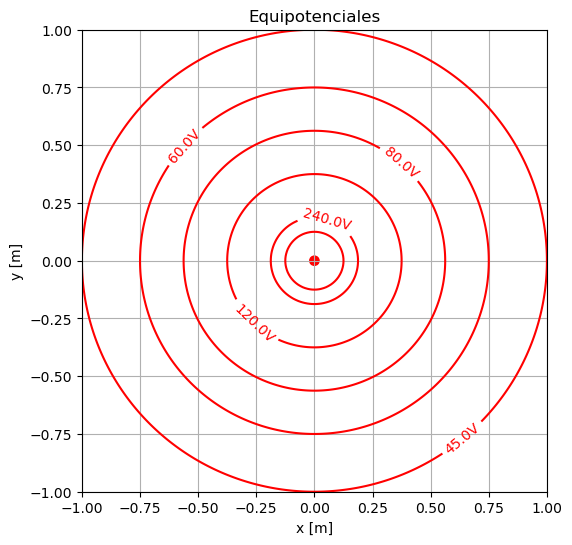

In [10]:
# Se eligen cuáles equipotenciales mostrar en una lista. 
niveles = [45, 60, 80, 120, 240, 360]

equipotencialesPuntuales(Q, niveles=niveles)

También podemos incluir las líneas de campo, indicando **True** para el parámetro _EF_.

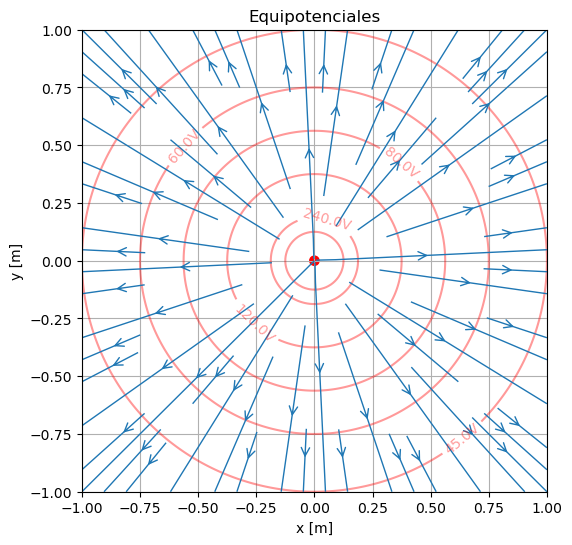

In [11]:
equipotencialesPuntuales(Q, niveles=niveles, EF=True)

## 2. <a id='toc2_'></a>[Dipolo eléctrico](#toc0_)

Para analizar el potencial eléctrico de un dipolo, se define la lista de cargas correspondiente, el resto de los pasos no cambia.

En este caso se trata de una carga de $1\text{ nC}$ ubicada en la posición $(-0.3,0,0)\text{ m}$ y otra carga de $-1\text{ nC}$ en la posición $(0.3,0,0)\text{ m}$.

In [12]:
Q = [
    [-1E-9,-0.3,0,0],
    [1E-9,0.3,0,0],
]

Calculemos el potencial en diferentes posiciones. En el origen obtenemos 0:

In [13]:
V(0,0,0,Q)

0.000

A la misma distancia a ambos lados obtenemos el mismo voltaje pero de signos opuestos:

In [14]:
V(0.5,0,0,Q) , V(-0.5,0,0,Q)

(33.750, -33.750)

En distintas posiciones del plano $x=0$ obtenemos siempre 0:

In [15]:
V(0,0.1,0,Q) , V(0,0,0.3, Q) , V(0,-0.6,0,Q) , V(0,0.5,-0.1,Q)

(0.000, 0.000, 0.000, 0.000)

Veamos las equipotenciales y sus líneas de campo.

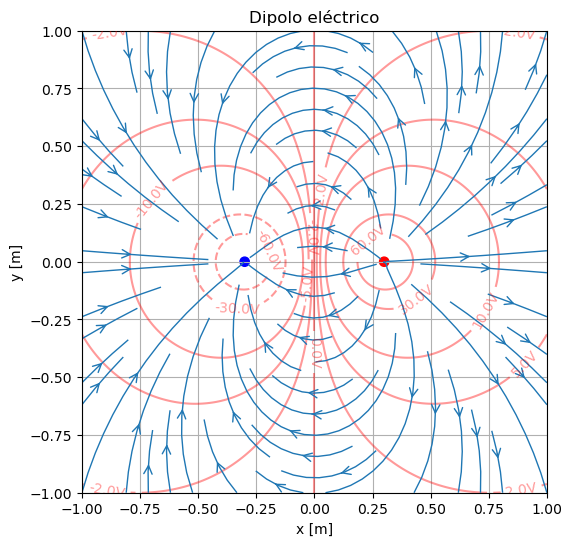

In [16]:
niveles = [-60, -30, -10, -5, -2, 0, 2, 5, 10, 30, 60]

equipotencialesPuntuales(Q, niveles=niveles, EF=True, titulo='Dipolo eléctrico')

Con el parámetro _dim_ cambiamos la escala de los ejes.

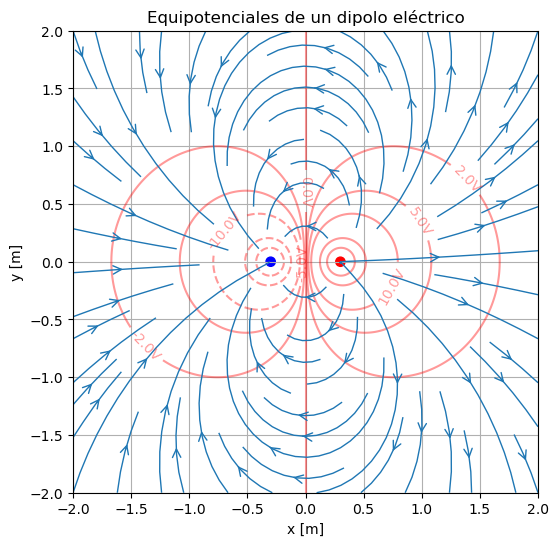

In [17]:
equipotencialesPuntuales(Q, niveles=niveles, dim=2, EF=True, titulo='Equipotenciales de un dipolo eléctrico')

Visto desde muy lejos:

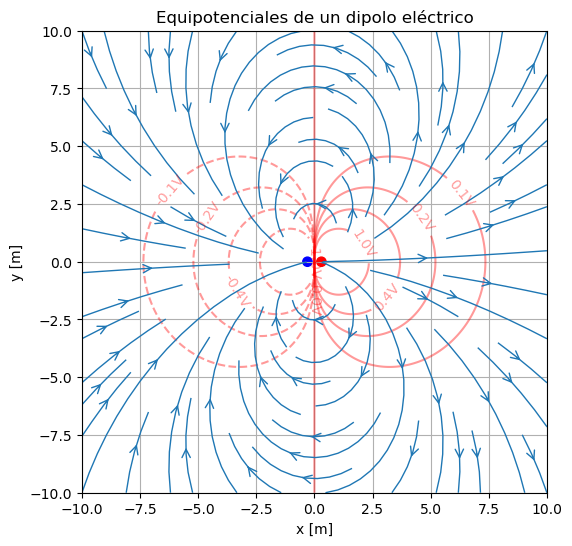

In [18]:
niveles = [-1, -0.4, -0.2, -0.1, 0, 0.1, 0.2, 0.4, 1]

equipotencialesPuntuales(Q, niveles=niveles, dim=10, EF=True, titulo='Equipotenciales de un dipolo eléctrico')

## 3. <a id='toc3_'></a>[Dos cargas iguales](#toc0_)

Ahora ambas cargas son positivas.

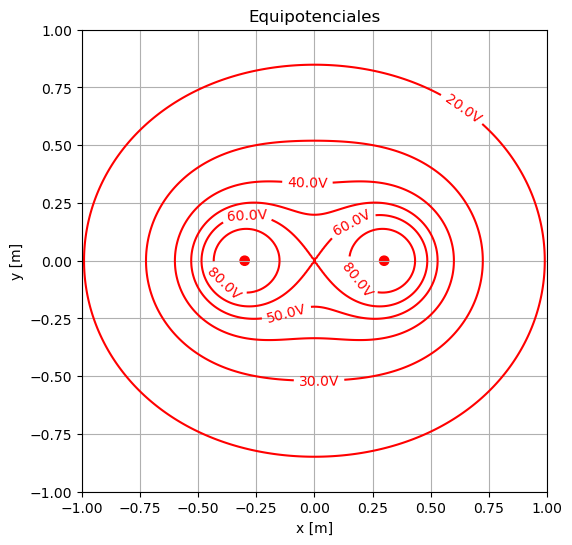

In [19]:
Q = [
    [1E-9,-0.3,0,0],
    [1E-9, 0.3,0,0],
]

niveles = [20, 30, 40, 50, 60 ,80]

equipotencialesPuntuales(Q, niveles=niveles)

Con las líneas de campo:

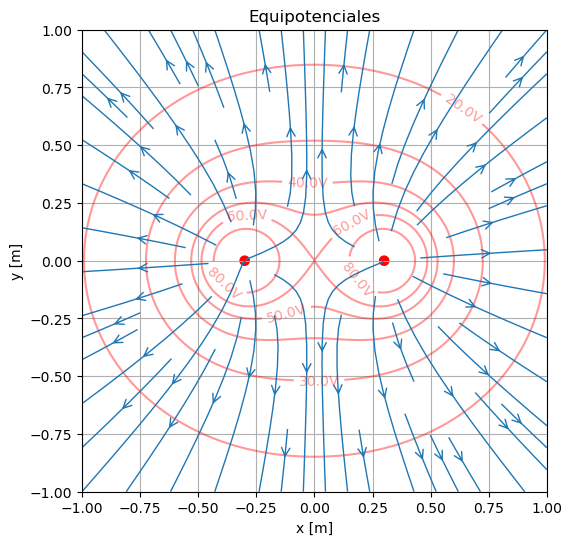

In [20]:
equipotencialesPuntuales(Q, niveles=niveles, EF=True)

Visto desde lejos:

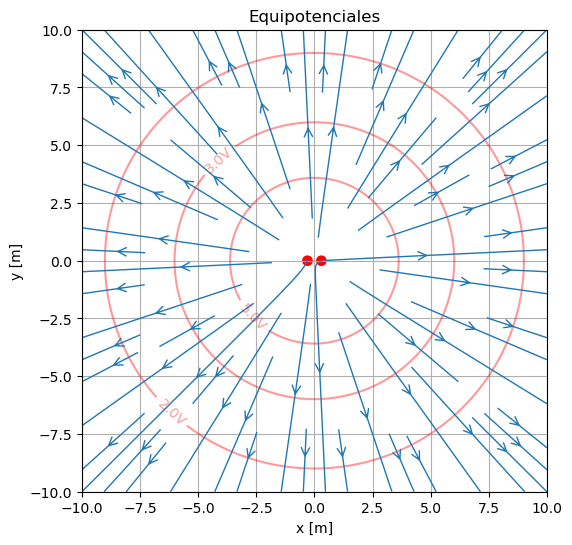

In [21]:
niveles = [2, 3, 5]
equipotencialesPuntuales(Q, niveles=niveles, EF=True, dim=10)

Observar la diferencia entre el dipolo y este caso con ambas cargas positivas. Cuando analizamos las líneas de campo muy lejos de las cargas, si ambas son positivas el resultado se aproxima al de una única carga puntual. En cambio, para el dipolo, siempre vemos el mismo patrón para todas las distancias.

## 4. <a id='toc4_'></a>[Ejercicio 1: cargas en los vértices de un cuadrado](#toc0_)

En los vértices de un cuadrado de 1 m se ubican las siguientes cargas: $q_1 = 10\,\text{nC}$, $q_2 = -20\,\text{nC}$, $q_3 = 30\,\text{nC}$ y $q_4 = 20\,\text{nC}$.  
  1. Calcular el potencial en el centro del cuadrado.
  1. Graficar las equipotenciales.

In [22]:
# 1. Calcular V



In [23]:
# 2. Gráfico de equipotenciales. 



## 5. <a id='toc5_'></a>[Cambiar el plano de las curvas equipotenciales](#toc0_)

Si bien hasta ahora graficamos **curvas** equipotenciales en el plano $xy$, es importante recordar que lo que estamos observando son las intersecciones de las **superficies** equipotenciales con el plano seleccionado.

Podemos buscar curvas equipotenciales en otros planos de la siguiente forma.

Con el parámetro _z_ definimos un plano paralelo al plano $xy$. Si utilizamos z=0 obtendremos los mismos resultados que antes. Probemos con una nueva configuración de cargas.


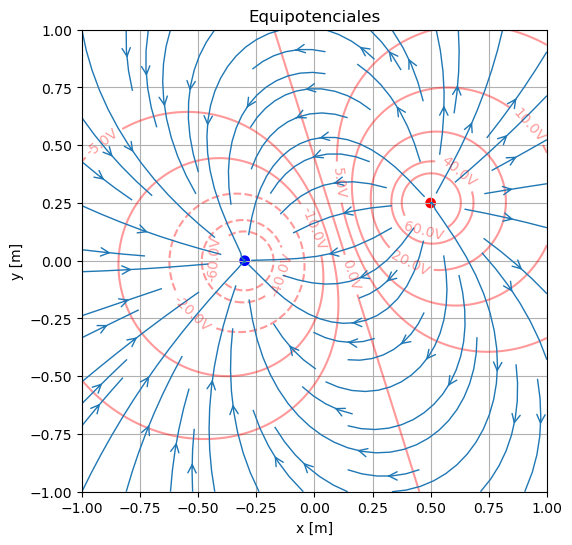

In [24]:
Q = [
    [-1E-9,-0.3,0,0],
    [1E-9,0.5,0.25,0],
]

niveles = [-60, -40, -20, -10, -5, 0, 5, 10, 20, 40, 60]

equipotencialesPuntuales(Q, niveles=niveles, EF=True, z = 0)

Elegir distintos valores de _z_ para subir o bajar el plano paralelo al plano $xy\,.$

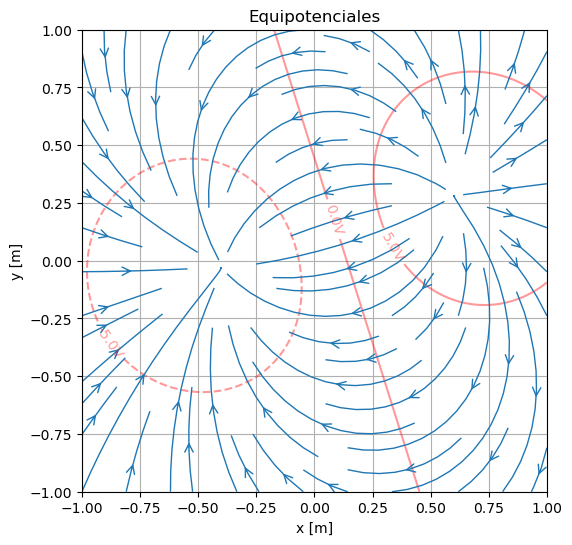

In [25]:
niveles = [-60, -40, -20, -10, -5, 0, 5, 10, 20, 40, 60]

equipotencialesPuntuales(Q, niveles=niveles, EF=True, z = 0.5)

Para graficar sobre un plano paralelo al plano $yz$ y obtener una vista rotada, se utiliza el parámetro _x_.

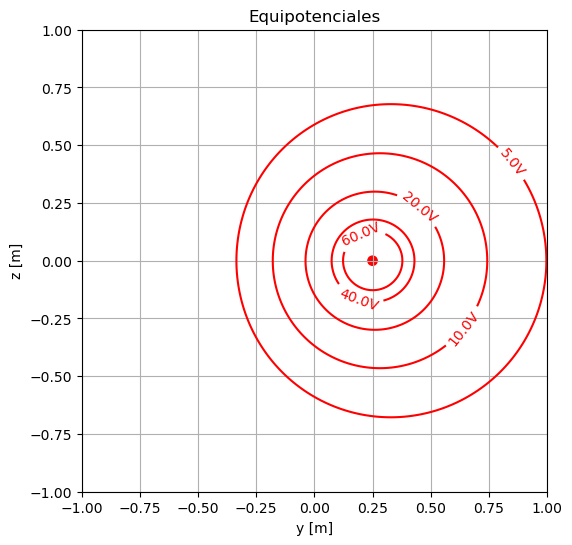

In [26]:
niveles = [-60, -40, -20, -10, -5, 0, 5, 10, 20, 40, 60]

equipotencialesPuntuales(Q, niveles=niveles, x = 0.5)

Elegir distintos valores de _y_ para obtener otra vista rotada.


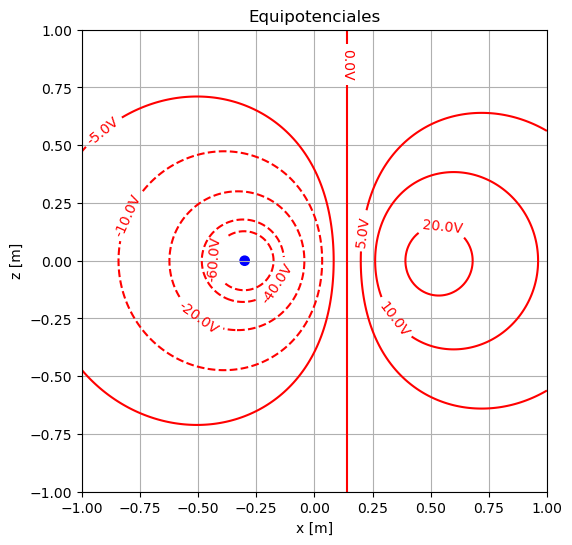

In [27]:
niveles = [-60, -40, -20, -10, -5, 0, 5, 10, 20, 40, 60]

equipotencialesPuntuales(Q, niveles=niveles, y = 0)